<a href="https://colab.research.google.com/github/pachterlab/LSCHWCP_2023/blob/main/Notebooks/Supp_Fig_9/Supp_Fig_9ab/gene_weight_and_enrichment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q anndata gget

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import anndata
import gget
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import textwrap
%config InlineBackend.figure_format='retina'

# Load average gene weights
The gene weight csv file was generated in [this notebook](https://github.com/pachterlab/LSCHWCP_2023/blob/main/Notebooks/Figure_8/Figure_8bc/plot_logistic_regression_results.ipynb).

In [ ]:
!wget https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/Notebooks/Figure_8/Figure_8bc/logreg_hv_gene_weights.csv

--2024-05-04 23:58:07--  https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/Notebooks/Figure_8/Figure_8bc/logreg_hv_gene_weights.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1501122 (1.4M) [text/plain]
Saving to: ‘logreg_hv_gene_weights.csv.2’

logreg_hv_gene_weig 100%[===================>]   1.43M  --.-KB/s    in 0.06s   

2024-05-04 23:58:07 (24.1 MB/s) - ‘logreg_hv_gene_weights.csv.2’ saved [1501122/1501122]



In [ ]:
# Using weights from models trained on highly variable (hv) genes only
genes_kind = 'hv'

gene_df = pd.read_csv(f"logreg_{genes_kind}_gene_weights.csv")
gene_df.head()

u10 Ensembl ID  u10 mean gene weight  u10 gene weight SD    u10 CV  \
0  ENSMMUG00000057389             -0.125785            0.024640 -0.195887   
1  ENSMMUG00000031200              0.046270            0.086435  1.868069   
2  ENSMMUG00000006214              0.129268            0.060947  0.471482   
3  ENSMMUG00000062580             -0.011055            0.024720 -2.236068   
4  ENSMMUG00000017324             -0.007177            0.016048 -2.236068   

   u102540 Ensembl ID  u102540 mean gene weight  u102540 gene weight SD  \
0  ENSMMUG00000057389                 -0.219067                0.089780   
1  ENSMMUG00000031200                  0.126374                0.107653   
2  ENSMMUG00000006214                  0.118511                0.358285   
3  ENSMMUG00000062580                 -0.007906                0.017678   
4  ENSMMUG00000017324                  0.000000                0.000000   

   u102540 CV   u11150 Ensembl ID  u11150 mean gene weight  \
0   -0.409830  ENSMMUG00000057389                -0.140815   
1    0.851856  ENSMMUG00000031200                -0.054751   
2    3.023212  ENSMMUG00000006214                 0.015814   
3   -2.236068  ENSMMUG00000062580                 0.000000   
4         NaN  ENSMMUG00000017324                 0.012712   

   u11150 gene weight SD  u11150 CV  u202260 Ensembl ID  \
0               0.021641  -0.153687  ENSMMUG00000057389   
1               0.060397  -1.103114  ENSMMUG00000031200   
2               0.010194   0.644622  ENSMMUG00000006214   
3               0.000000        NaN  ENSMMUG00000062580   
4               0.002423   0.190582  ENSMMUG00000017324   

   u202260 mean gene weight  u202260 gene weight SD  u202260 CV  \
0                 -2.267793                0.498300   -0.219729   
1                  0.408430                0.279153    0.683480   
2                 -0.316651                0.275236   -0.869209   
3                  0.039102                0.100131    2.560753   
4                  0.018538                0.072906    3.932712   

    u39566 Ensembl ID  u39566 mean gene weight  u39566 gene weight SD  \
0  ENSMMUG00000057389                -2.982434               0.358650   
1  ENSMMUG00000031200                 0.057937               0.032101   
2  ENSMMUG00000006214                 0.017675               0.035137   
3  ENSMMUG00000062580                -0.211993               0.179263   
4  ENSMMUG00000017324                 0.240489               0.269409   

   u39566 CV  u134800 Ensembl ID  u134800 mean gene weight  \
0  -0.120254  ENSMMUG00000057389                 -0.760738   
1   0.554066  ENSMMUG00000031200                  0.052394   
2   1.988009  ENSMMUG00000006214                 -0.009152   
3  -0.845608  ENSMMUG00000062580                  0.000000   
4   1.120256  ENSMMUG00000017324                  0.000000   

   u134800 gene weight SD  u134800 CV  u102324 Ensembl ID  \
0                0.159016   -0.209029  ENSMMUG00000057389   
1                0.168713    3.220119  ENSMMUG00000031200   
2                0.127568  -13.939240  ENSMMUG00000006214   
3                0.000000         NaN  ENSMMUG00000062580   
4                0.000000         NaN  ENSMMUG00000017324   

   u102324 mean gene weight  u102324 gene weight SD  u102324 CV  
0                 -2.050326                0.265421   -0.129453  
1                 -0.000433                0.131320 -302.940077  
2                 -0.153259                0.235871   -1.539035  
3                 -0.035671                0.072469   -2.031562  
4                 -0.021336                0.034920   -1.636697

In [ ]:
virs = ['u10', 'u102540', 'u11150', 'u202260']

# Define thresholds for genes included in enrichment analysis

In [ ]:
# Top [n_genes] will be included in enrichment analysis (the gene weight of the [n_genes]th gene will become the minimum gene weight)
n_genes = 50
# n_genes = 20  # For filtering based on coefficient of variation (CV) as an alternative

# Define maximum standard deviation ([sd_threshold] = fraction of minimum gene weight)
sd_threshold = 0.5

# Plot gene weight distributions

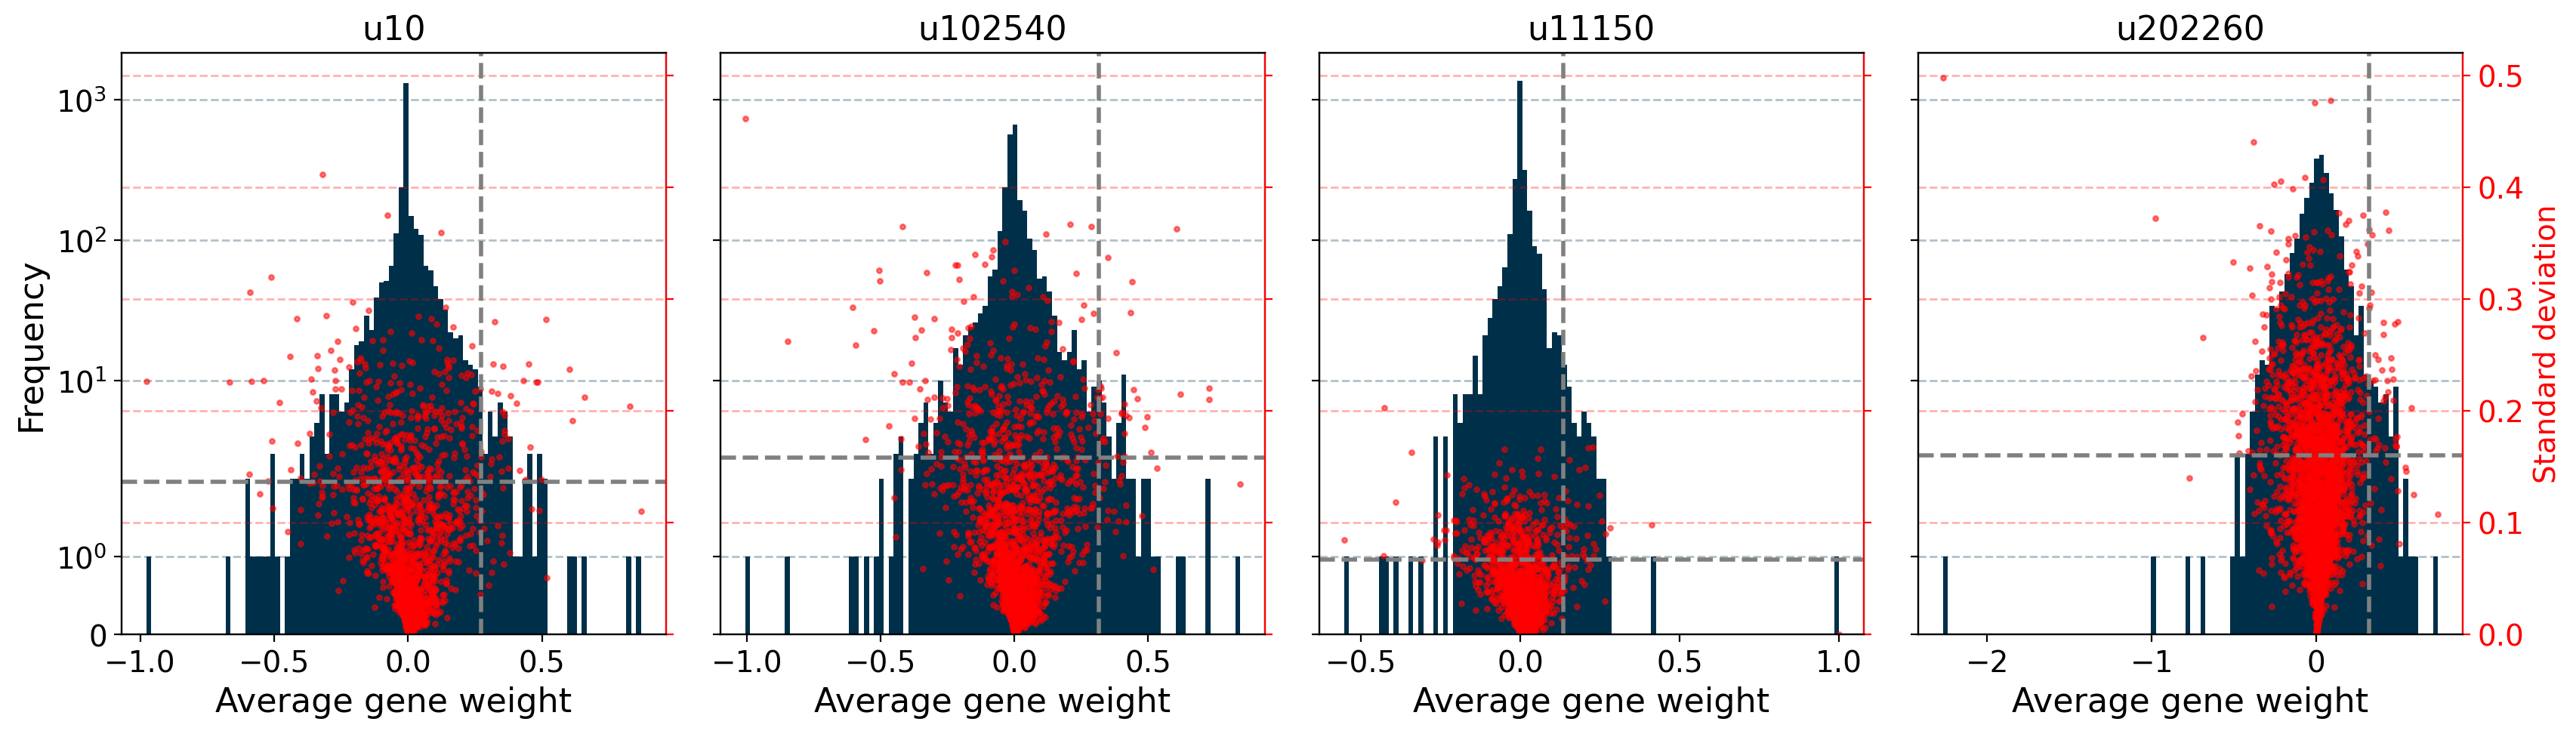

In [ ]:
fig, axs = plt.subplots(figsize =(20, 5), ncols=len(virs), sharey=True)
fontsize = 14

col_idx = 0
for i, vir in enumerate(virs):
    ax = axs[col_idx]
    ax.hist(gene_df[f"{vir} mean gene weight"].values,  bins = 100, color="#003049")

    # Plot standard deviation between gene weights with different random seeds
    ax2 = ax.twinx()
    ax2.scatter(gene_df[f"{vir} mean gene weight"].values, gene_df[f"{vir} gene weight SD"].values, color="red", s=5, alpha=0.5)
    ax2.set_ylim(0, 0.52)
    # ax2.set_yscale("symlog")
    ax2.spines['right'].set_color('red')
    ax2.grid(True, which="both", color='red', ls="--", lw=1, alpha=0.3)
    if i == len(virs)-1:
        ax2.set_ylabel('Standard deviation', color='red', fontsize=fontsize)
        ax2.tick_params(axis="both", labelsize=fontsize, colors="red")
    else:
        ax2.set_yticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5], labels=[])
        ax2.tick_params(axis="both", labelsize=fontsize, colors="red")

    ax.set_title(vir, fontsize=fontsize+2)

    ax.grid(True, which="both", color="#003049", ls="--", lw=1, alpha=0.3)
    ax.set_axisbelow(True)
    ax.xaxis.grid(False)

    ax.set_yscale("symlog")
    ax.tick_params(axis="both", labelsize=fontsize)

    if col_idx == 0:
        ax.set_ylabel("Frequency", fontsize=fontsize+2)
    ax.set_xlabel("Average gene weight", fontsize=fontsize+2)

    # Show cut-off based on X number of top genes and SD threshold
    # (vertical line shows minimum weight and horizontal line shows maximum SD)
    weight_thresh = gene_df.sort_values(f"{vir} mean gene weight", ascending=False)[f"{vir} mean gene weight"].values[n_genes]
    ax2.axvline(weight_thresh, ls="--", color="grey", lw=2)
    sd_threshold_temp = sd_threshold * weight_thresh
    ax2.axhline(sd_threshold_temp, ls="--", color="grey", lw=2)

    col_idx += 1

plt.subplots_adjust(wspace=0.1, hspace=0.2)

fig.savefig(
    f"{genes_kind}_gene_weights.png", dpi=300, bbox_inches="tight", transparent=True
)

fig.show()

# Plot coefficient of variation (CV) for each gene

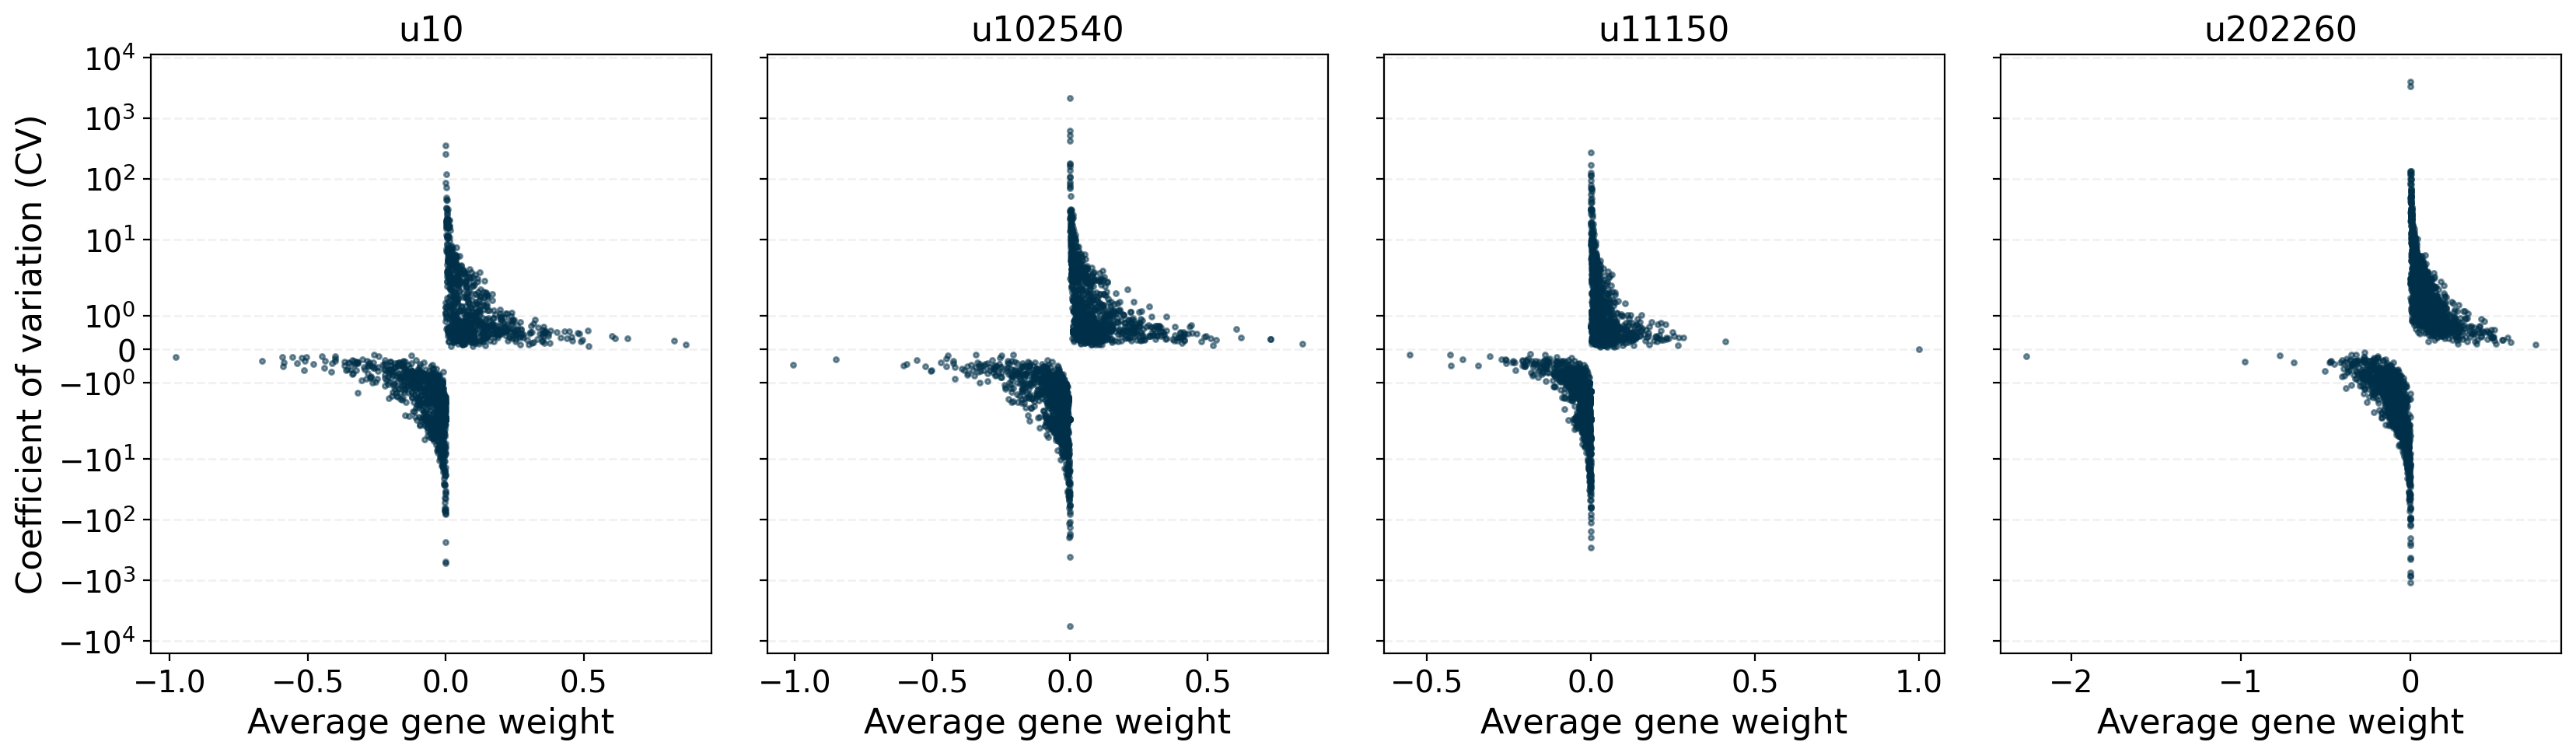

In [ ]:
fig, axs = plt.subplots(figsize =(20, 5), ncols=len(virs), sharey=True)
fontsize = 14

col_idx = 0
for i, vir in enumerate(virs):
    ax = axs[col_idx]

    ax.scatter(gene_df[f"{vir} mean gene weight"].values, gene_df[f"{vir} CV"].values, color="#003049", s=5, alpha=0.5)

    ax.set_title(vir, fontsize=fontsize+2)

    ax.grid(True, which="both", color="lightgrey", ls="--", lw=1, alpha=0.3)
    ax.set_axisbelow(True)
    ax.xaxis.grid(False)

    ax.set_yscale("symlog")
    ax.tick_params(axis="both", labelsize=fontsize)

    if col_idx == 0:
        ax.set_ylabel("Coefficient of variation (CV)", fontsize=fontsize+2)
    ax.set_xlabel("Average gene weight", fontsize=fontsize+2)

    col_idx += 1

plt.subplots_adjust(wspace=0.1, hspace=0.2)

fig.savefig(
    f"{genes_kind}_CV_over_weight.png", dpi=300, bbox_inches="tight", transparent=True
)

fig.show()

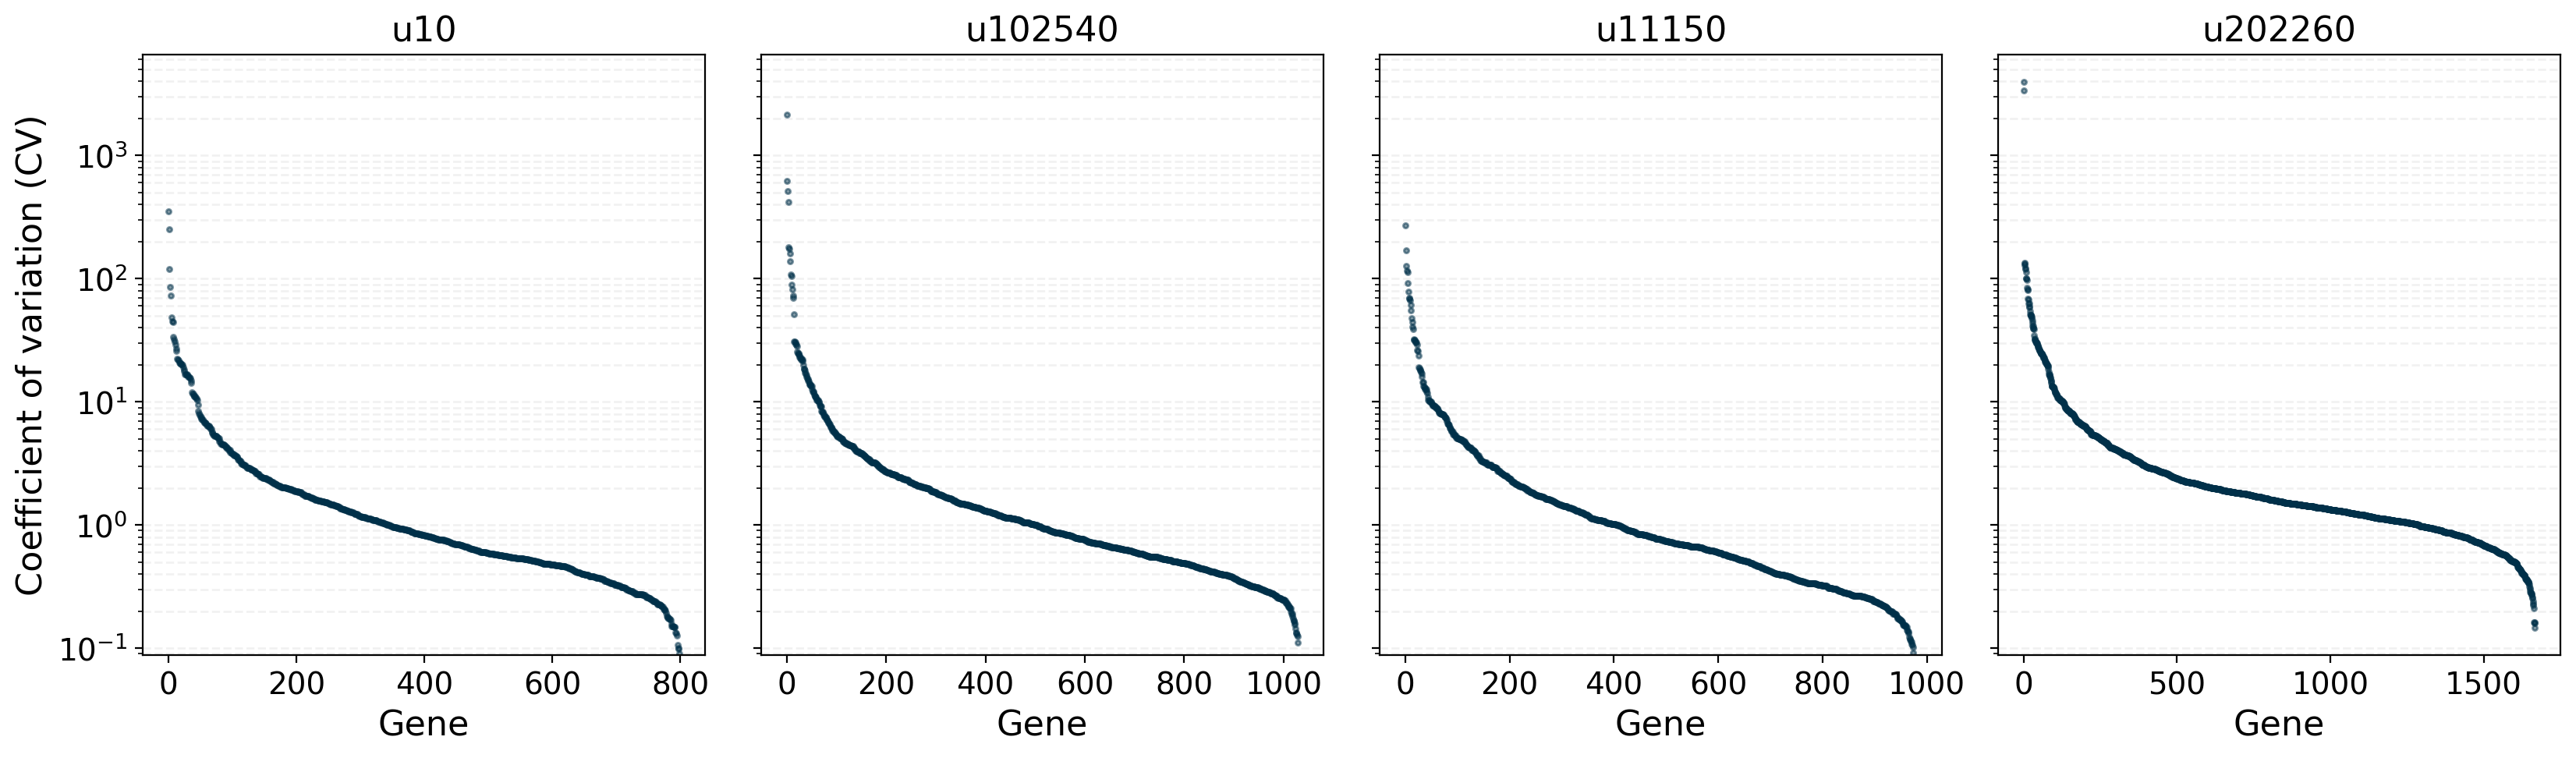

In [ ]:
fig, axs = plt.subplots(figsize =(20, 5), ncols=len(virs), sharey=True)
fontsize = 14

col_idx = 0
for i, vir in enumerate(virs):
    ax = axs[col_idx]

    # Only taking into account positive gene weights
    gene_df_temp = gene_df[gene_df[f"{vir} mean gene weight"] > 0].sort_values(f"{vir} CV", ascending=False)
    x = np.arange(len(gene_df_temp[f"{vir} Ensembl ID"].values))
    ax.scatter(x, gene_df_temp[f"{vir} CV"].values, color="#003049", s=5, alpha=0.5)

    ax.set_title(vir, fontsize=fontsize+2)

    ax.grid(True, which="both", color="lightgrey", ls="--", lw=1, alpha=0.3)
    ax.set_axisbelow(True)
    ax.xaxis.grid(False)

    ax.set_yscale("log")
    ax.tick_params(axis="both", labelsize=fontsize)

    if col_idx == 0:
        ax.set_ylabel("Coefficient of variation (CV)", fontsize=fontsize+2)
    ax.set_xlabel("Gene", fontsize=fontsize+2)

    # # Show n_genes threshold line (for filtering based on CV)
    # ax.axvline(x[-n_genes], ls="--", color="grey", lw=1.5)

    col_idx += 1

plt.subplots_adjust(wspace=0.1, hspace=0.2)

fig.savefig(
    f"{genes_kind}_CV_per_gene.png", dpi=300, bbox_inches="tight", transparent=True
)

fig.show()

# Look up Ensembl IDs and perform enrichment analysis

In [ ]:
# Define enrichment database
database="GO_Biological_Process_2023"

Alternative databases:  
KEGG_2021_Human
WikiPathway_2023_Human  
Reactome_2022  
GO_Biological_Process_2023  
Microbe_Perturbations_from_GEO_up  
Virus_Perturbations_from_GEO_up  

In [ ]:
def get_genes(vir):
    """
    Function to get list of genes from gene weight data frame to perform enrichment analysis on.
    """
    # Get minimum gene weight based on number of genes to include
    weight_thresh = gene_df.sort_values(f"{vir} mean gene weight", ascending=False)[f"{vir} mean gene weight"].values[n_genes]
    sd_threshold_temp = sd_threshold * weight_thresh
    # Get genes that pass weight and SD filtering
    genes = gene_df[(gene_df[f"{vir} gene weight SD"] <= sd_threshold_temp) & (gene_df[f"{vir} mean gene weight"] >= weight_thresh)].sort_values(f"{vir} mean gene weight", ascending=False)[f"{vir} Ensembl ID"].values

    # # Alternative: Filter based on CV
    # genes = gene_df[gene_df[f"{vir} mean gene weight"] > 0].sort_values(f"{vir} CV")[f"{vir} Ensembl ID"].values[:n_genes]

    # Get gene symbols/names from Ensembl ID with gget info
    df = gget.info(genes, verbose=False)

    return df

In [ ]:
vir = "u10"
# Look up Ensembl IDs
u10_info_df = get_genes(vir)
u10_info_df.head()

ensembl_id  \
ENSMMUG00000064723  ENSMMUG00000064723.1   
ENSMMUG00000032156  ENSMMUG00000032156.3   
ENSMMUG00000059476  ENSMMUG00000059476.1   
ENSMMUG00000013020  ENSMMUG00000013020.4   
ENSMMUG00000011221  ENSMMUG00000011221.4   

                                                          uniprot_id pdb_id  \
ENSMMUG00000064723                                            G7NI81    NaN   
ENSMMUG00000032156                                            F7GR11    NaN   
ENSMMUG00000059476                                               NaN    NaN   
ENSMMUG00000013020  [A0A1D5QLX1, F7HP21, A0A1D5QT83, F7HP23, F7HB17]    NaN   
ENSMMUG00000011221                                  [F6WY73, F6WY67]    NaN   

                   ncbi_gene_id         species assembly_name  \
ENSMMUG00000064723       698841  macaca_mulatta       Mmul_10   
ENSMMUG00000032156       716086  macaca_mulatta       Mmul_10   
ENSMMUG00000059476          NaN  macaca_mulatta       Mmul_10   
ENSMMUG00000013020       699705  macaca_mulatta       Mmul_10   
ENSMMUG00000011221       694379  macaca_mulatta       Mmul_10   

                   primary_gene_name ensembl_gene_name synonyms parent_gene  \
ENSMMUG00000064723             GSDMA             GSDMA  [GSDM1]         NaN   
ENSMMUG00000032156             C3AR1             C3AR1       []         NaN   
ENSMMUG00000059476               NaN               NaN       []         NaN   
ENSMMUG00000013020               GSN               GSN       []         NaN   
ENSMMUG00000011221             FCAMR             FCAMR       []         NaN   

                                             protein_names  \
ENSMMUG00000064723                                     NaN   
ENSMMUG00000032156  C3a anaphylatoxin chemotactic receptor   
ENSMMUG00000059476                                     NaN   
ENSMMUG00000013020                                Gelsolin   
ENSMMUG00000011221                              [nan, nan]   

                                                  ensembl_description  \
ENSMMUG00000064723   gasdermin A [Source:VGNC Symbol;Acc:VGNC:104606]   
ENSMMUG00000032156  complement C3a receptor 1 [Source:VGNC Symbol;...   
ENSMMUG00000059476                                                NaN   
ENSMMUG00000013020       gelsolin [Source:VGNC Symbol;Acc:VGNC:73299]   
ENSMMUG00000011221  Fc alpha and mu receptor [Source:VGNC Symbol;A...   

                                                  uniprot_description  \
ENSMMUG00000064723                                                      
ENSMMUG00000032156  Receptor for the chemotactic and inflammatory ...   
ENSMMUG00000059476                                                NaN   
ENSMMUG00000013020  Calcium-regulated, actin-modulating protein th...   
ENSMMUG00000011221                                     [[nan], [nan]]   

                   ncbi_description   subcellular_localisation object_type  \
ENSMMUG00000064723              NaN                        NaN        Gene   
ENSMMUG00000032156              NaN  [Cell membrane, Membrane]        Gene   
ENSMMUG00000059476              NaN                        NaN        Gene   
ENSMMUG00000013020              NaN    Cytoplasm, cytoskeleton        Gene   
ENSMMUG00000011221              NaN                 [nan, nan]        Gene   

                           biotype  canonical_transcript seq_region_name  \
ENSMMUG00000064723  protein_coding  ENSMMUT00000081448.1              16   
ENSMMUG00000032156  protein_coding  ENSMMUT00000047254.3              11   
ENSMMUG00000059476          lncRNA  ENSMMUT00000081442.1               4   
ENSMMUG00000013020  protein_coding  ENSMMUT00000018262.4              15   
ENSMMUG00000011221  protein_coding  ENSMMUT00000015699.4               1   

                   strand      start        end  \
ENSMMUG00000064723      1   51097068   51112908   
ENSMMUG00000032156      1   11457245   11462817   
ENSMMUG00000059476     -1  166558457  166573574   
ENSMMUG00000013020     -1   21382024   2144

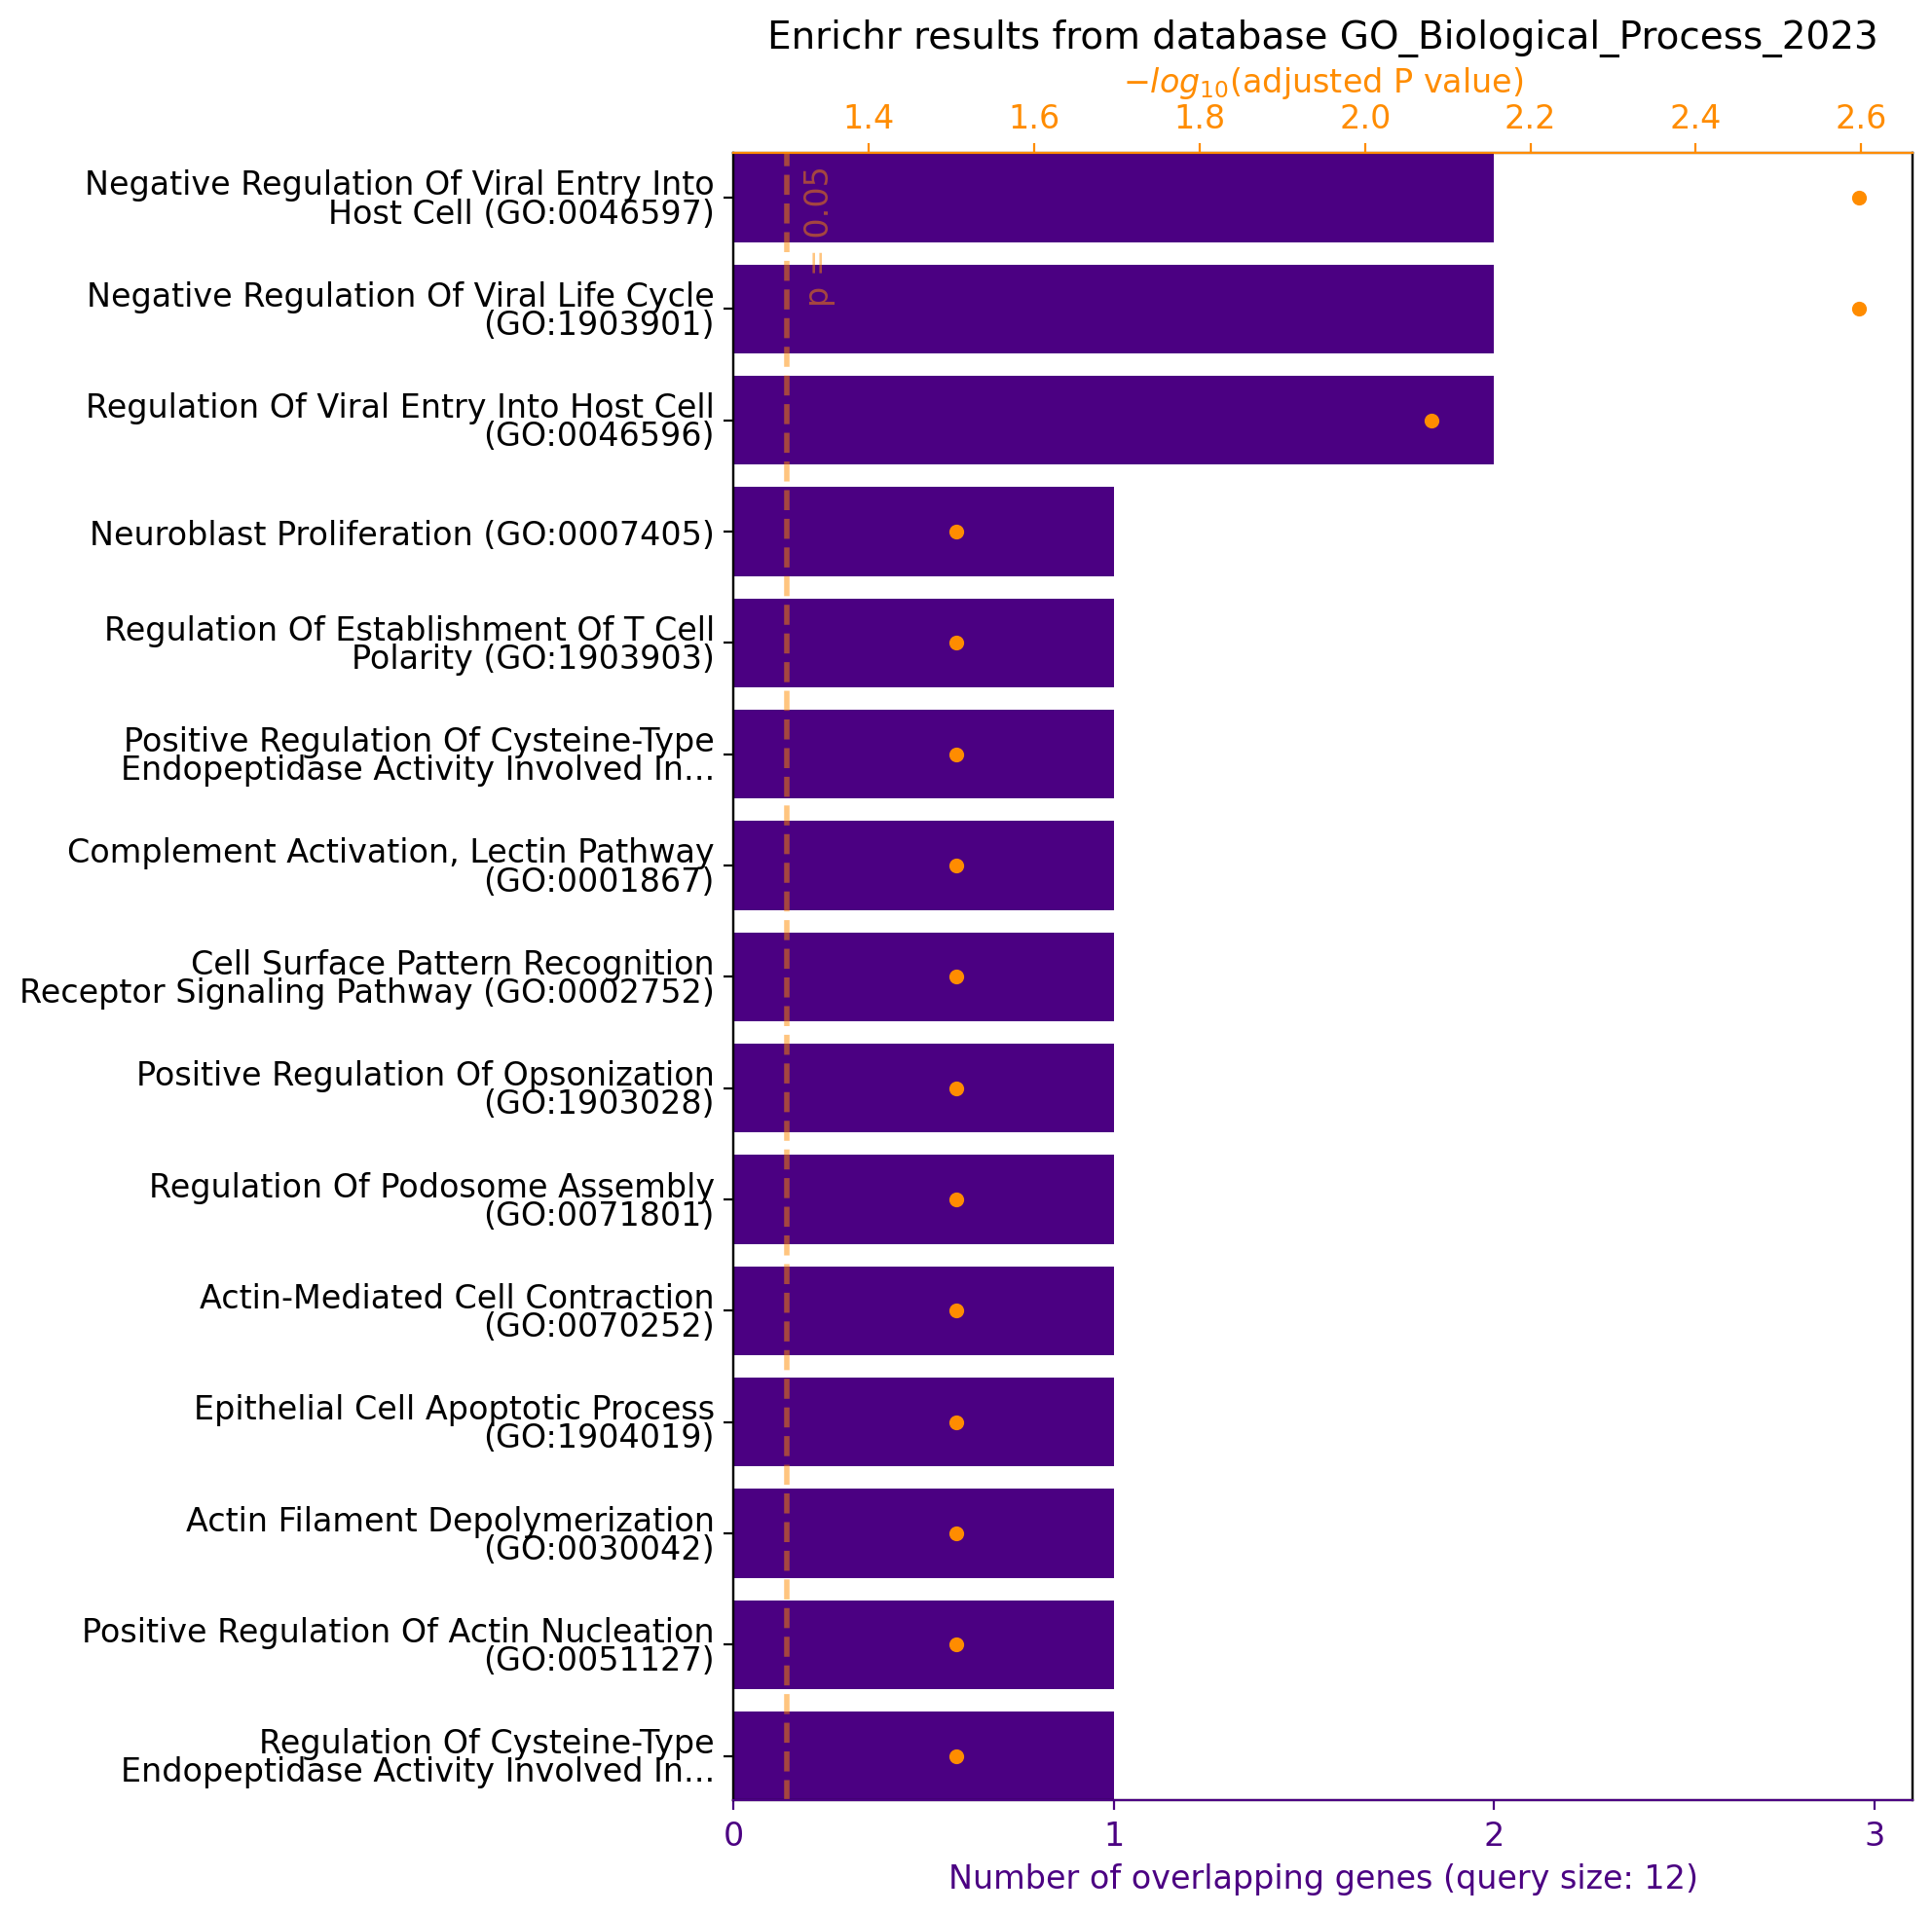

In [ ]:
# Perform enrichment analysis
u10_enrichr_df = gget.enrichr(u10_info_df["ensembl_gene_name"].values, database=database, background=True, plot=True)

In [ ]:
vir = "u102540"
# Look up Ensembl IDs
u102540_info_df = get_genes(vir)
u102540_info_df.head()

ensembl_id            uniprot_id pdb_id  \
ENSMMUG00000049915  ENSMMUG00000049915.1            A0A5F7ZKI2    NaN   
ENSMMUG00000018070  ENSMMUG00000018070.4  [F7EKU1, A0A1D5RK37]    NaN   
ENSMMUG00000016096  ENSMMUG00000016096.4                F6W890    NaN   
ENSMMUG00000040771  ENSMMUG00000040771.2  [A0A5F8AD54, F7H602]    NaN   
ENSMMUG00000050443  ENSMMUG00000050443.1                   NaN    NaN   

                   ncbi_gene_id         species assembly_name  \
ENSMMUG00000049915       720763  macaca_mulatta       Mmul_10   
ENSMMUG00000018070       715235  macaca_mulatta       Mmul_10   
ENSMMUG00000016096       719414  macaca_mulatta       Mmul_10   
ENSMMUG00000040771          NaN  macaca_mulatta       Mmul_10   
ENSMMUG00000050443          NaN  macaca_mulatta       Mmul_10   

                   primary_gene_name ensembl_gene_name synonyms parent_gene  \
ENSMMUG00000049915         LOC720763               NaN       []         NaN   
ENSMMUG00000018070             NCAPG             NCAPG       []         NaN   
ENSMMUG00000016096              LMNA              LMNA       []         NaN   
ENSMMUG00000040771        [nan, nan]               NaN       []         NaN   
ENSMMUG00000050443               NaN               NaN       []         NaN   

                                                 protein_names  \
ENSMMUG00000049915  Interferon-induced transmembrane protein 3   
ENSMMUG00000018070                                  [nan, nan]   
ENSMMUG00000016096                                         NaN   
ENSMMUG00000040771           Ig-like domain-containing protein   
ENSMMUG00000050443                                         NaN   

                                                  ensembl_description  \
ENSMMUG00000049915                                                NaN   
ENSMMUG00000018070  non-SMC condensin I complex subunit G [Source:...   
ENSMMUG00000016096      lamin A/C [Source:VGNC Symbol;Acc:VGNC:74427]   
ENSMMUG00000040771                                                NaN   
ENSMMUG00000050443                                                NaN   

                   uniprot_description ncbi_description  \
ENSMMUG00000049915                                  NaN   
ENSMMUG00000018070                                  NaN   
ENSMMUG00000016096                                  NaN   
ENSMMUG00000040771      [[nan], [nan]]              NaN   
ENSMMUG00000050443                 NaN              NaN   

                   subcellular_localisation object_type         biotype  \
ENSMMUG00000049915                      NaN        Gene  protein_coding   
ENSMMUG00000018070               Chromosome        Gene  protein_coding   
ENSMMUG00000016096         [Nucleus lamina]        Gene  protein_coding   
ENSMMUG00000040771               [nan, nan]        Gene  protein_coding   
ENSMMUG00000050443                      NaN        Gene          lncRNA   

                    canonical_transcript seq_region_name strand      start  \
ENSMMUG00000049915  ENSMMUT00000088310.1              14     -1     372240   
ENSMMUG00000018070  ENSMMUT00000066296.2               5      1   16808032   
ENSMMUG00000016096  ENSMMUT00000045733.3               1     -1   94827268   
ENSMMUG00000040771  ENSMMUT00000081302.1               7     -1  167972417   
ENSMMUG00000050443  ENSMMUT00000080311.1              10      1   45400926   

                          end  \
ENSMMUG00000049915     378002   
ENSMMUG00000018070   16840804   
ENSMMUG00000016096   94888787   
ENSMMUG00000040771  168077516   
ENSMMUG00000050443   45407065   

                                                      all_transcripts  \
ENSMMUG00000049915                             [ENSMMUT00000088310.1]   
ENSMMUG00000018070       [ENSMMUT00000066296.2, ENSMMUT00000025383.4]   
ENSMMUG00000016096  [ENSMMUT00000045733.3, ENSMMUT00000022635.4, E...   
ENSMMUG00000040771  [ENSMMUT00000012963.4, ENSMMUT00000101882.1, E...   
ENSMMUG00000050443                             [EN

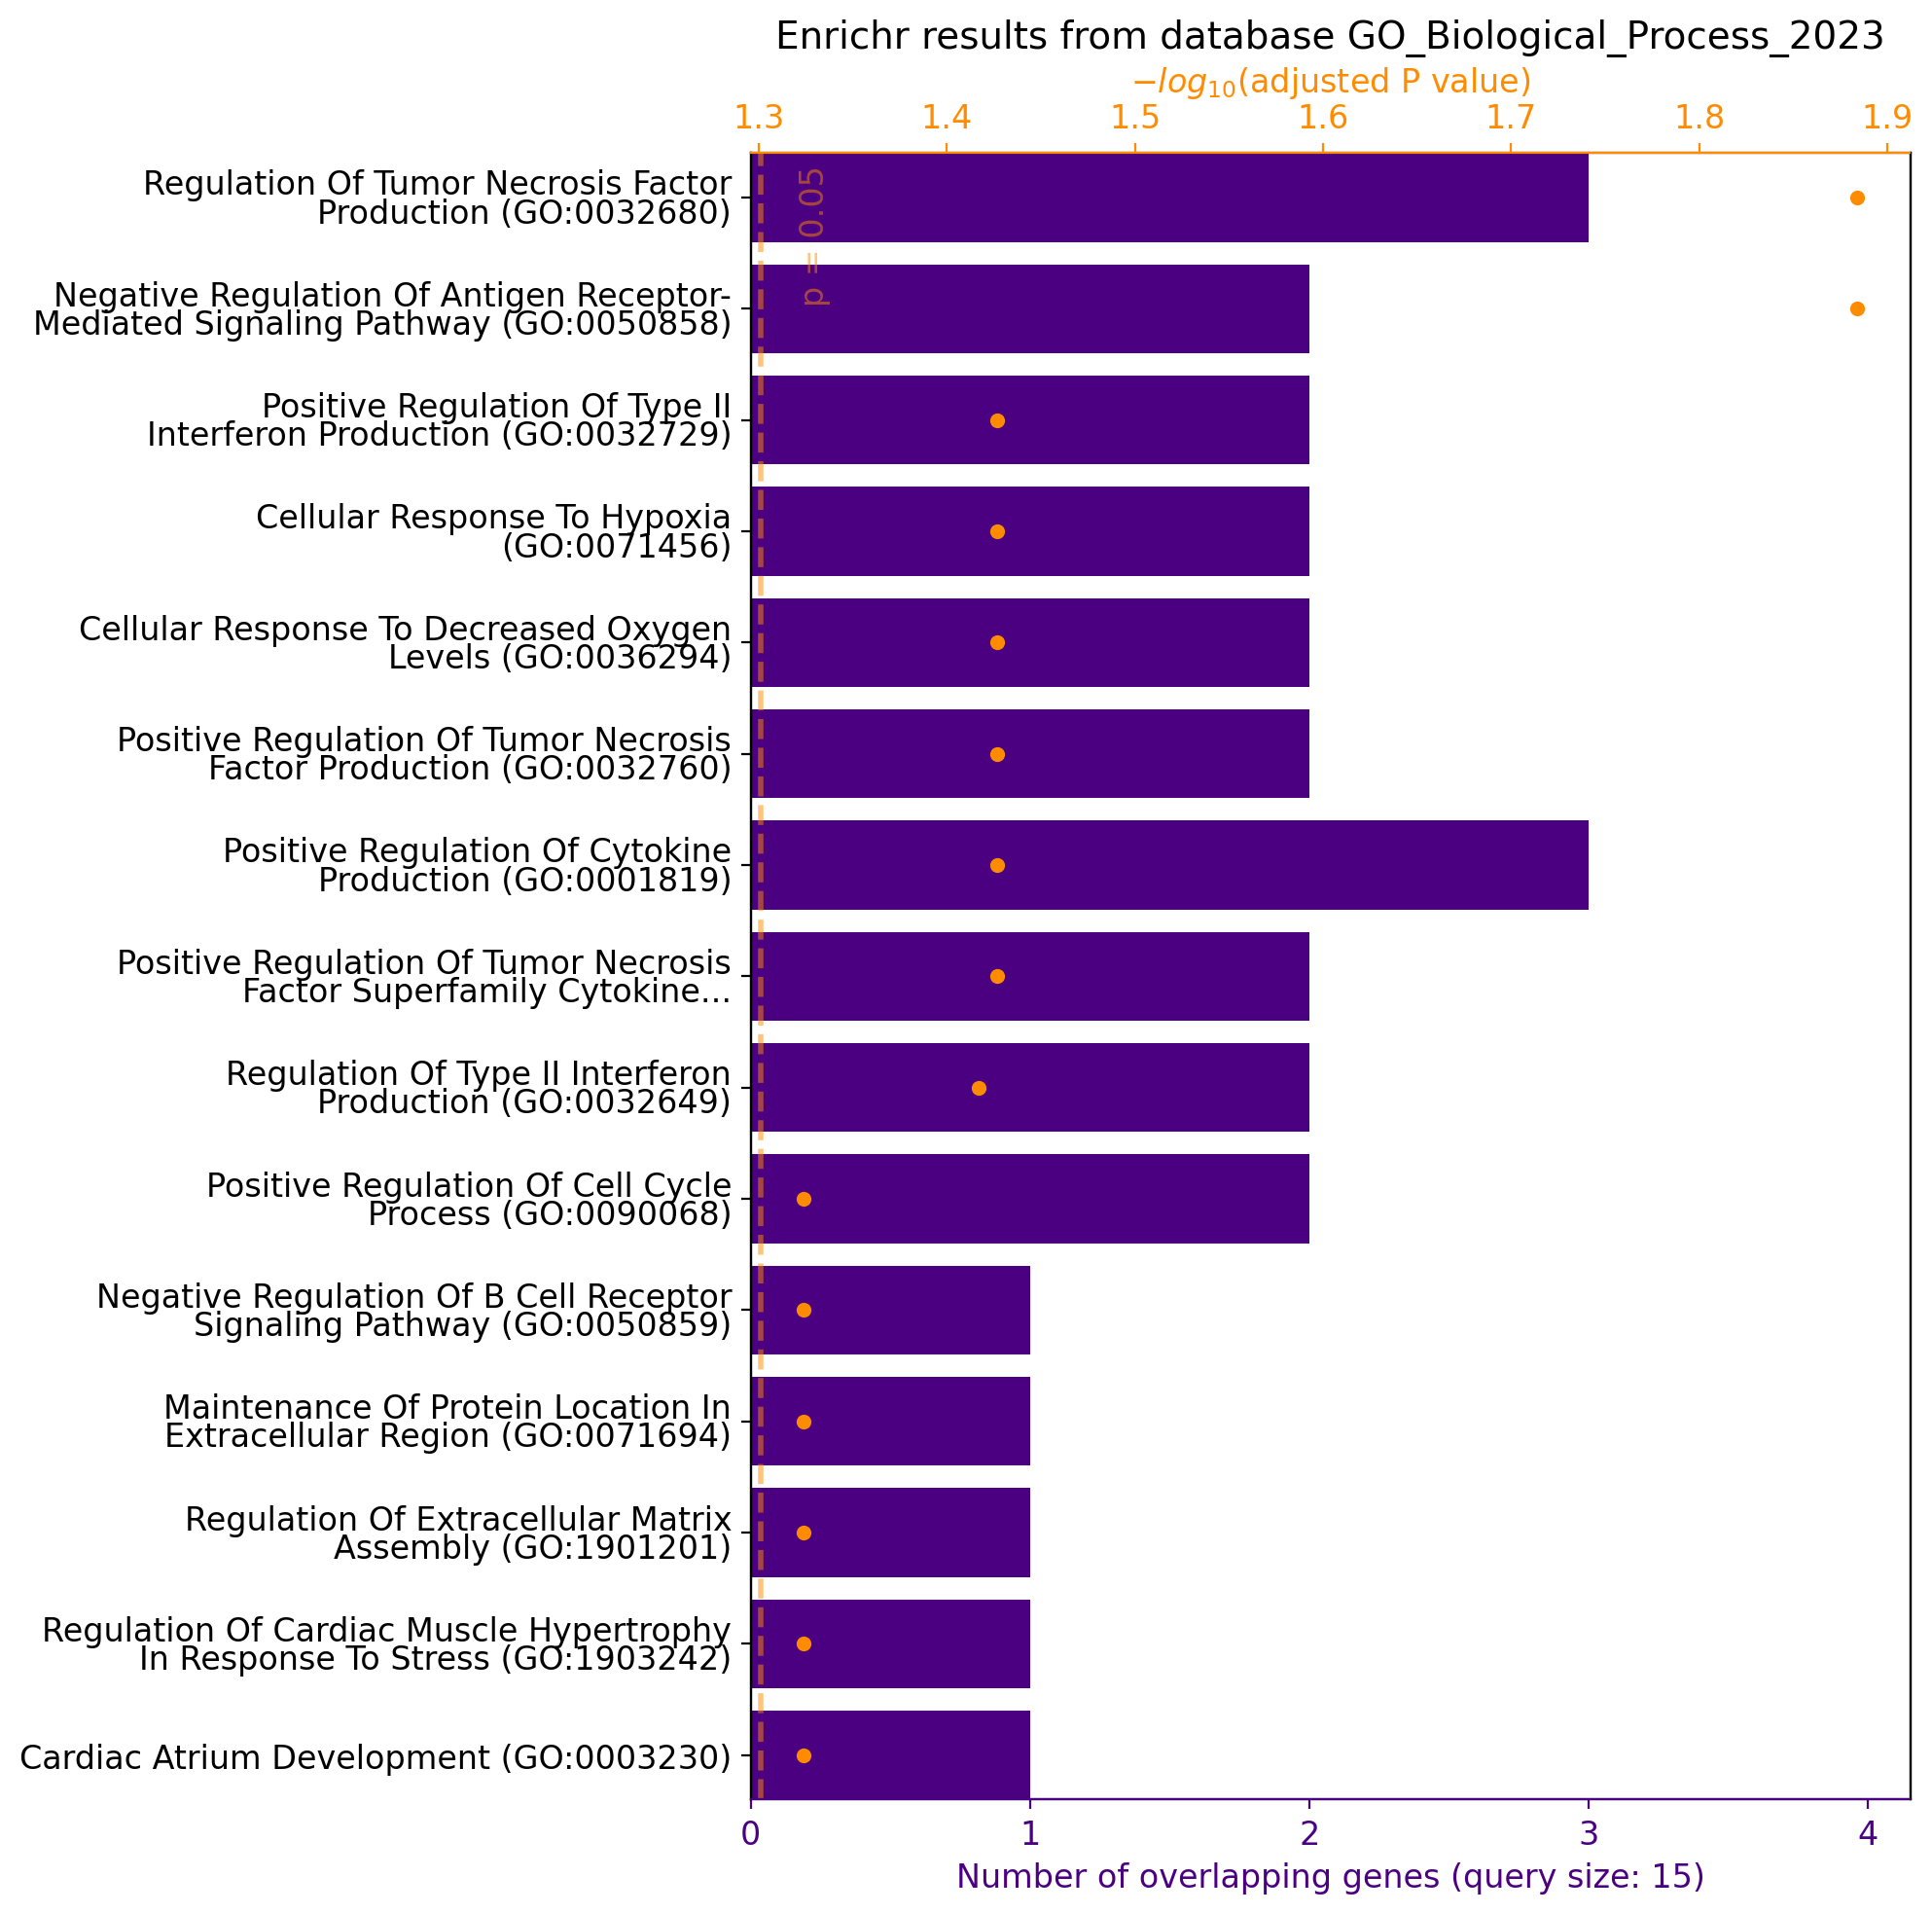

In [ ]:
# Perform enrichment analysis
u102540_enrichr_df = gget.enrichr(u102540_info_df["ensembl_gene_name"].dropna(axis=0).values, database=database, background=True, plot=True)

In [ ]:
vir = "u11150"
# Look up Ensembl IDs
u11150_info_df = get_genes(vir)
u11150_info_df.head()

ensembl_id                    uniprot_id pdb_id  \
ENSMMUG00000065375  ENSMMUG00000065375.1                        Q6IYH3    NaN   
ENSMMUG00000063707  ENSMMUG00000063707.1                           NaN    NaN   
ENSMMUG00000060294  ENSMMUG00000060294.1                        F7HAP4    NaN   
ENSMMUG00000062789  ENSMMUG00000062789.1                           NaN    NaN   
ENSMMUG00000020823  ENSMMUG00000020823.4  [F7HSL6, F7F2A5, A0A5F7ZE05]    NaN   

                   ncbi_gene_id         species assembly_name  \
ENSMMUG00000065375      2846629  macaca_mulatta       Mmul_10   
ENSMMUG00000063707          NaN  macaca_mulatta       Mmul_10   
ENSMMUG00000060294       696629  macaca_mulatta       Mmul_10   
ENSMMUG00000062789          NaN  macaca_mulatta       Mmul_10   
ENSMMUG00000020823       721921  macaca_mulatta       Mmul_10   

                   primary_gene_name ensembl_gene_name     synonyms  \
ENSMMUG00000065375              ATP6              ATP6           []   
ENSMMUG00000063707               NaN               NaN           []   
ENSMMUG00000060294             H2AC6             H2AC6  [HIST1H2AC]   
ENSMMUG00000062789               NaN               NaN           []   
ENSMMUG00000020823               VCL               VCL           []   

                   parent_gene           protein_names  \
ENSMMUG00000065375         NaN  ATP synthase subunit a   
ENSMMUG00000063707         NaN                     NaN   
ENSMMUG00000060294         NaN             Histone H2A   
ENSMMUG00000062789         NaN                     NaN   
ENSMMUG00000020823         NaN                Vinculin   

                                                  ensembl_description  \
ENSMMUG00000065375  ATP synthase F0 subunit 6 [Source:NCBI gene (f...   
ENSMMUG00000063707                                                NaN   
ENSMMUG00000060294  H2A clustered histone 6 [Source:VGNC Symbol;Ac...   
ENSMMUG00000062789                                                NaN   
ENSMMUG00000020823      vinculin [Source:VGNC Symbol;Acc:VGNC:106118]   

                                                  uniprot_description  \
ENSMMUG00000065375  Mitochondrial membrane ATP synthase (F(1)F(0) ...   
ENSMMUG00000063707                                                NaN   
ENSMMUG00000060294  Core component of nucleosome. Nucleosomes wrap...   
ENSMMUG00000062789                                                NaN   
ENSMMUG00000020823  Actin filament (F-actin)-binding protein invol...   

                   ncbi_description  \
ENSMMUG00000065375              NaN   
ENSMMUG00000063707              NaN   
ENSMMUG00000060294              NaN   
ENSMMUG00000062789              NaN   
ENSMMUG00000020823              NaN   

                                             subcellular_localisation  \
ENSMMUG00000065375           [Membrane, Mitochondrion inner membrane]   
ENSMMUG00000063707                                                NaN   
ENSMMUG00000060294                              [Chromosome, Nucleus]   
ENSMMUG00000062789                                                NaN   
ENSMMUG00000020823  [Cell junction, adherens junction, Cell membra...   

                   object_type         biotype  canonical_transcript  \
ENSMMUG00000065375        Gene  protein_coding  ENSMMUT00000110393.1   
ENSMMUG00000063707        Gene          lncRNA  ENSMMUT00000100242.1   
ENSMMUG00000060294        Gene  protein_coding  ENSMMUT00000057350.2   
ENSMMUG00000062789        Gene          lncRNA  ENSMMUT00000104519.1   
ENSMMUG00000020823        Gene  protein_coding  ENSMMUT00000029294.4   

                   seq_region_name strand      start        end  \
ENSMMUG00000065375              MT      1       8518       9198   
ENSMMUG00000063707      ML143124.1     -1     671106     676860   
ENSMMUG00000060294               4     -1  143851758  143868220   
ENSMMUG00000062789              15     -1   67543082   67548338   
ENSMMUG00000020823               9     -1   63679048   6

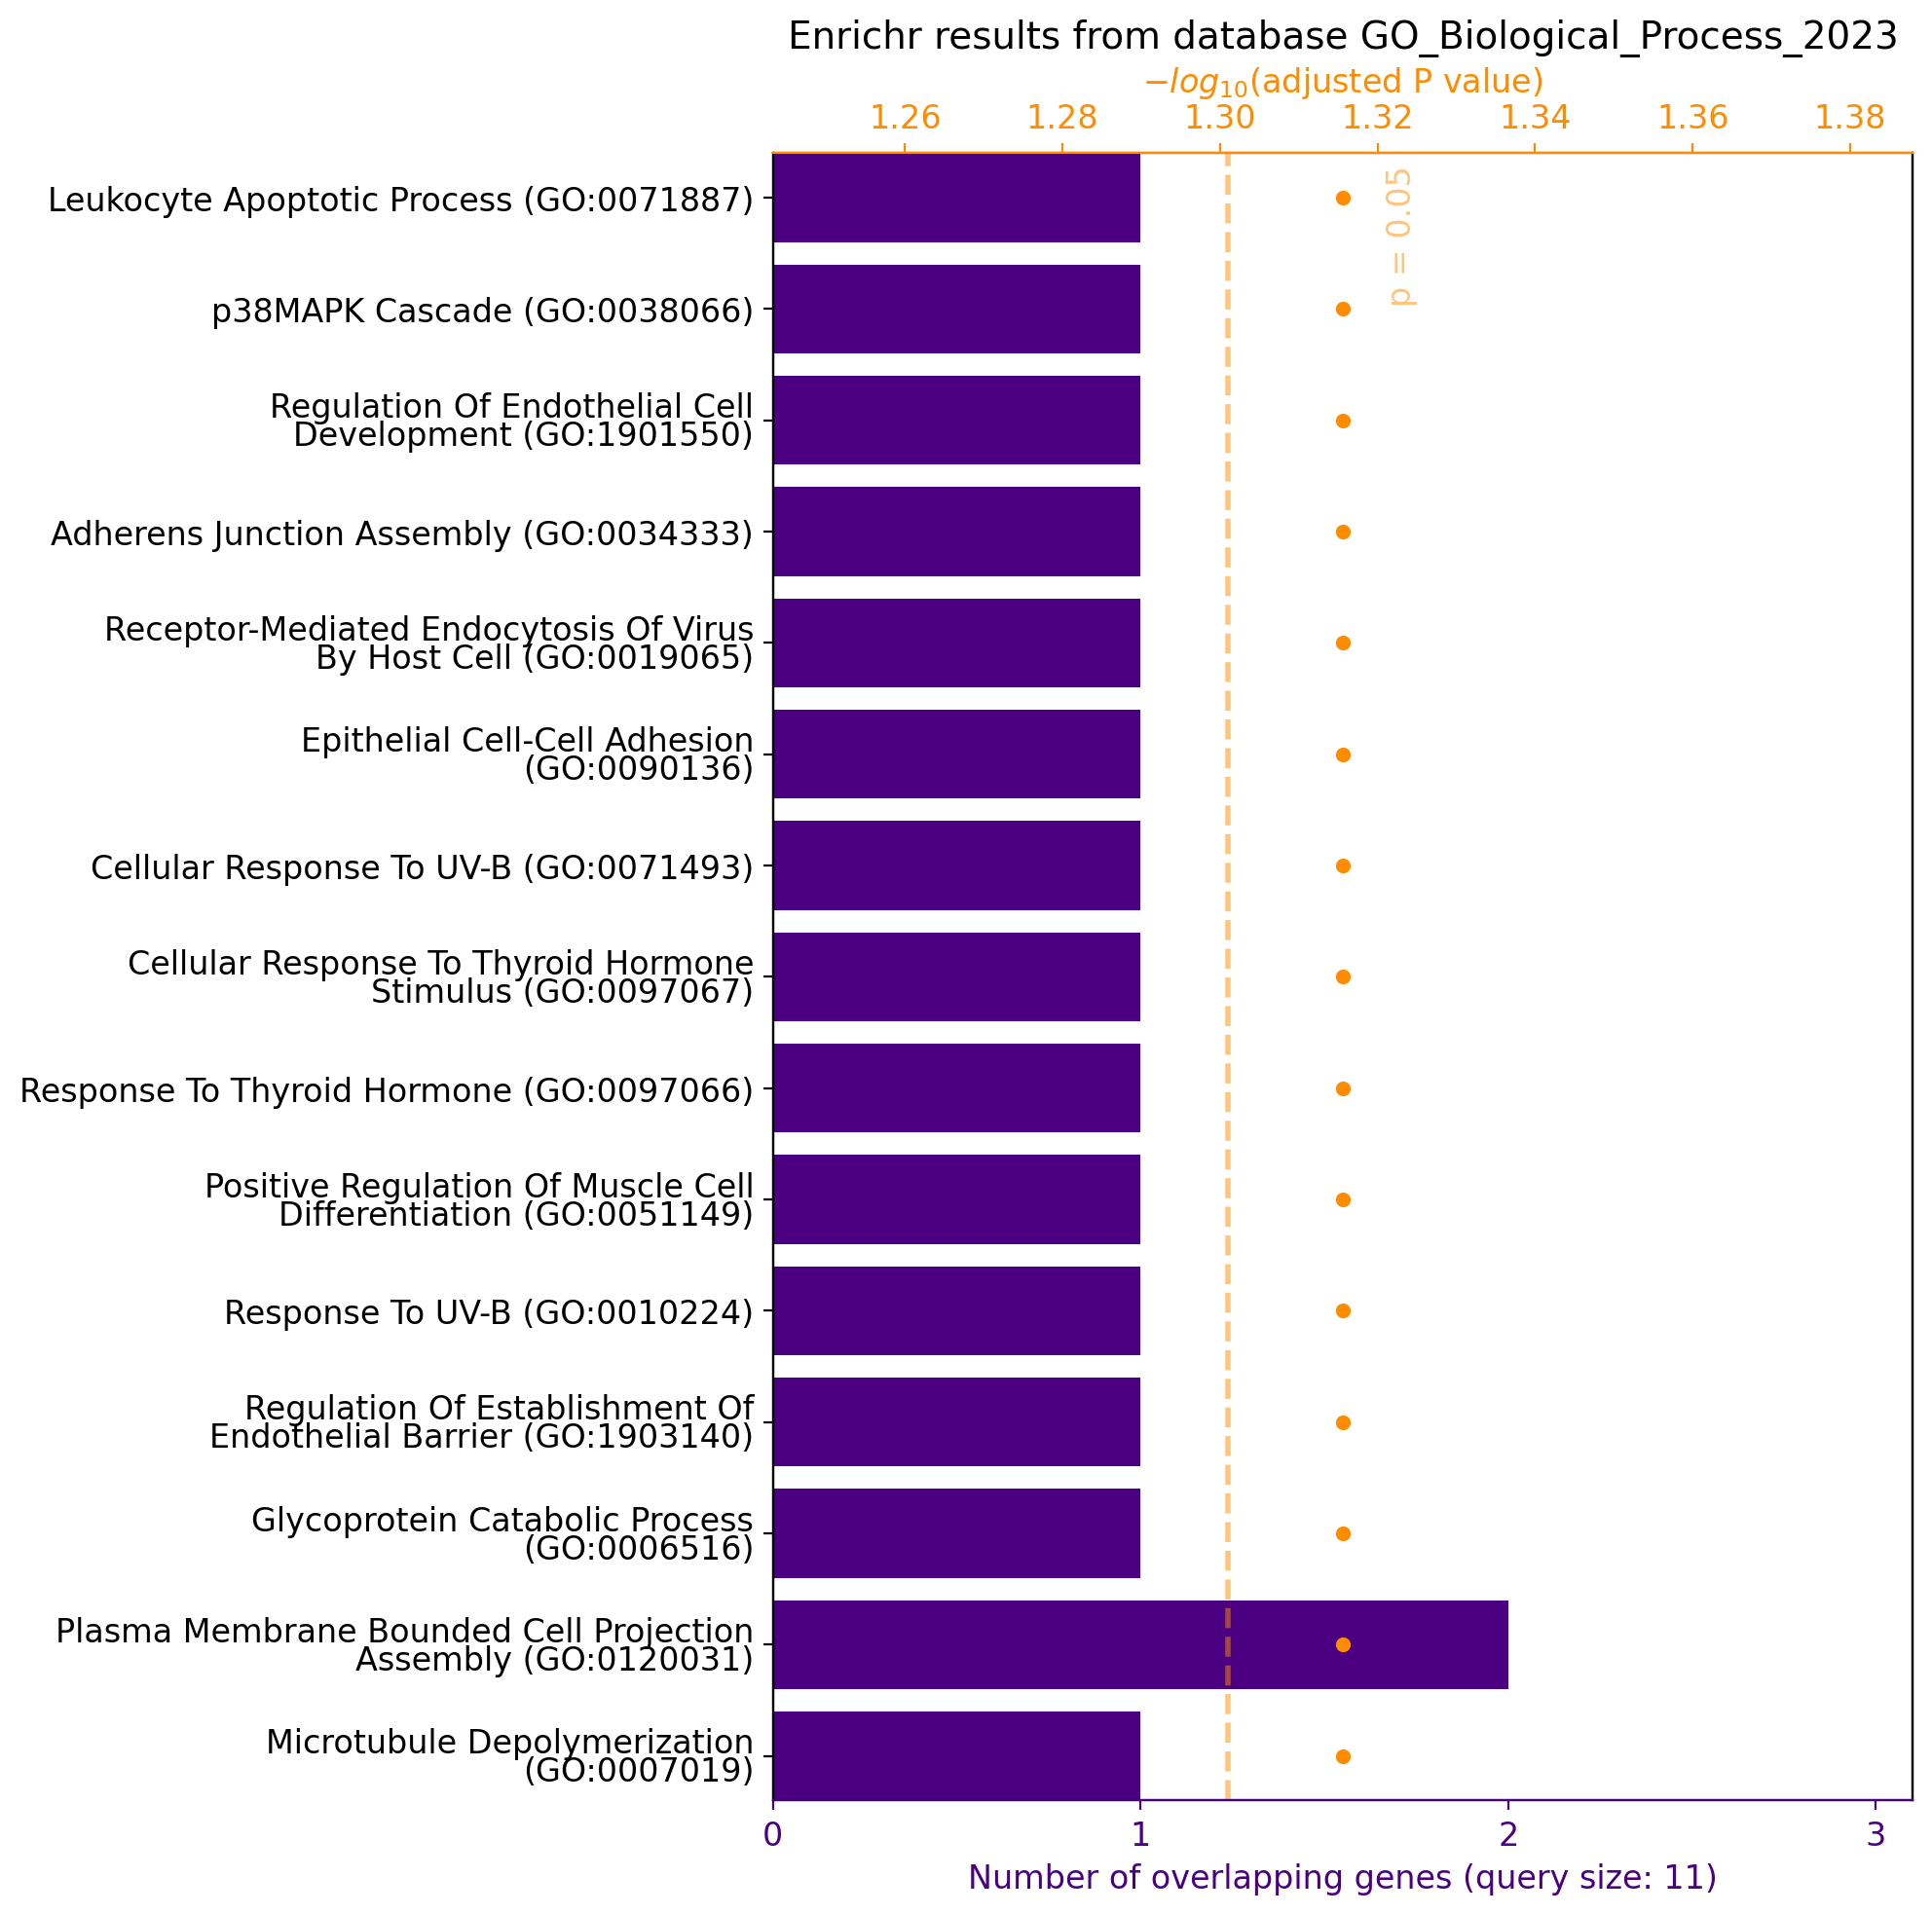

In [ ]:
# Perform enrichment analysis
u11150_enrichr_df = gget.enrichr(u11150_info_df["ensembl_gene_name"].dropna(axis=0).values, database=database, background=True, plot=True)

In [ ]:
vir = "u202260"
# Look up Ensembl IDs
u202260_info_df = get_genes(vir)
u202260_info_df.head()

ensembl_id  \
ENSMMUG00000002657  ENSMMUG00000002657.4   
ENSMMUG00000009602  ENSMMUG00000009602.4   
ENSMMUG00000020172  ENSMMUG00000020172.4   
ENSMMUG00000007032  ENSMMUG00000007032.4   
ENSMMUG00000018814  ENSMMUG00000018814.4   

                                                           uniprot_id pdb_id  \
ENSMMUG00000002657                                             F7H4W7    NaN   
ENSMMUG00000009602                               [A0A1D5Q0P0, F7AC39]    NaN   
ENSMMUG00000020172                   [A0A5F7ZQE5, F6TIX6, A0A1D5Q9X8]    NaN   
ENSMMUG00000007032           [F7F1Y7, A0A5F7ZGX6, A0A1D5RDN7, F7F1Y2]    NaN   
ENSMMUG00000018814  [A0A1D5Q1X3, A0A5F7ZDB8, F6ZHC1, A0A5F7ZGN9, F...    NaN   

                   ncbi_gene_id         species assembly_name  \
ENSMMUG00000002657       694574  macaca_mulatta       Mmul_10   
ENSMMUG00000009602       713425  macaca_mulatta       Mmul_10   
ENSMMUG00000020172       706441  macaca_mulatta       Mmul_10   
ENSMMUG00000007032       699541  macaca_mulatta       Mmul_10   
ENSMMUG00000018814          NaN  macaca_mulatta       Mmul_10   

                   primary_gene_name ensembl_gene_name synonyms parent_gene  \
ENSMMUG00000002657             OLFM4             OLFM4       []         NaN   
ENSMMUG00000009602              XAF1              XAF1       []         NaN   
ENSMMUG00000020172          KIAA1755          KIAA1755       []         NaN   
ENSMMUG00000007032            PKD1L1            PKD1L1       []         NaN   
ENSMMUG00000018814              DGKA              DGKA   [CDK2]         NaN   

                                                        protein_names  \
ENSMMUG00000002657                                                NaN   
ENSMMUG00000009602                                         [nan, nan]   
ENSMMUG00000020172                                    [nan, nan, nan]   
ENSMMUG00000007032                          [nan, Checkpoint protein]   
ENSMMUG00000018814  [Diacylglycerol kinase, Cyclin-dependent kinas...   

                                                  ensembl_description  \
ENSMMUG00000002657  olfactomedin 4 [Source:VGNC Symbol;Acc:VGNC:75...   
ENSMMUG00000009602  XIAP associated factor 1 [Source:VGNC Symbol;A...   
ENSMMUG00000020172       KIAA1755 [Source:VGNC Symbol;Acc:VGNC:73942]   
ENSMMUG00000007032  polycystin 1 like 1, transient receptor potent...   
ENSMMUG00000018814  diacylglycerol kinase alpha [Source:VGNC Symbo...   

                      uniprot_description ncbi_description  \
ENSMMUG00000002657                                     NaN   
ENSMMUG00000009602         [[nan], [nan]]              NaN   
ENSMMUG00000020172  [[nan], [nan], [nan]]              NaN   
ENSMMUG00000007032          [, [nan], , ]              NaN   
ENSMMUG00000018814                                     NaN   

                                             subcellular_localisation  \
ENSMMUG00000002657                                                NaN   
ENSMMUG00000009602                                         [nan, nan]   
ENSMMUG00000020172                                    [nan, nan, nan]   
ENSMMUG00000007032                                           Membrane   
ENSMMUG00000018814  [Cytoplasm, cytosol, Cytoplasm, Nucleus, Cajal...   

                   object_type         biotype  canonical_transcript  \
ENSMMUG00000002657        Gene  protein_coding  ENSMMUT00000003783.3   
ENSMMUG00000009602        Gene  protein_coding  ENSMMUT00000056601.2   
ENSMMUG00000020172        Gene  protein_coding  ENSMMUT00000053550.2   
ENSMMUG00000007032        Gene  protein_coding  ENSMMUT00000009823.4   
ENSMMUG00000018814        Gene  protein_coding  ENSMMUT00000058081.2   

                   seq_region_name strand     start       end  \
ENSMMUG00000002657              17      1  31519752  31543903   
ENSMMUG00000009602              16      1   6511425   6534665   
ENSMMUG00000020172              10     -1  73473939  73526598   
ENSMMUG00000007032               3 

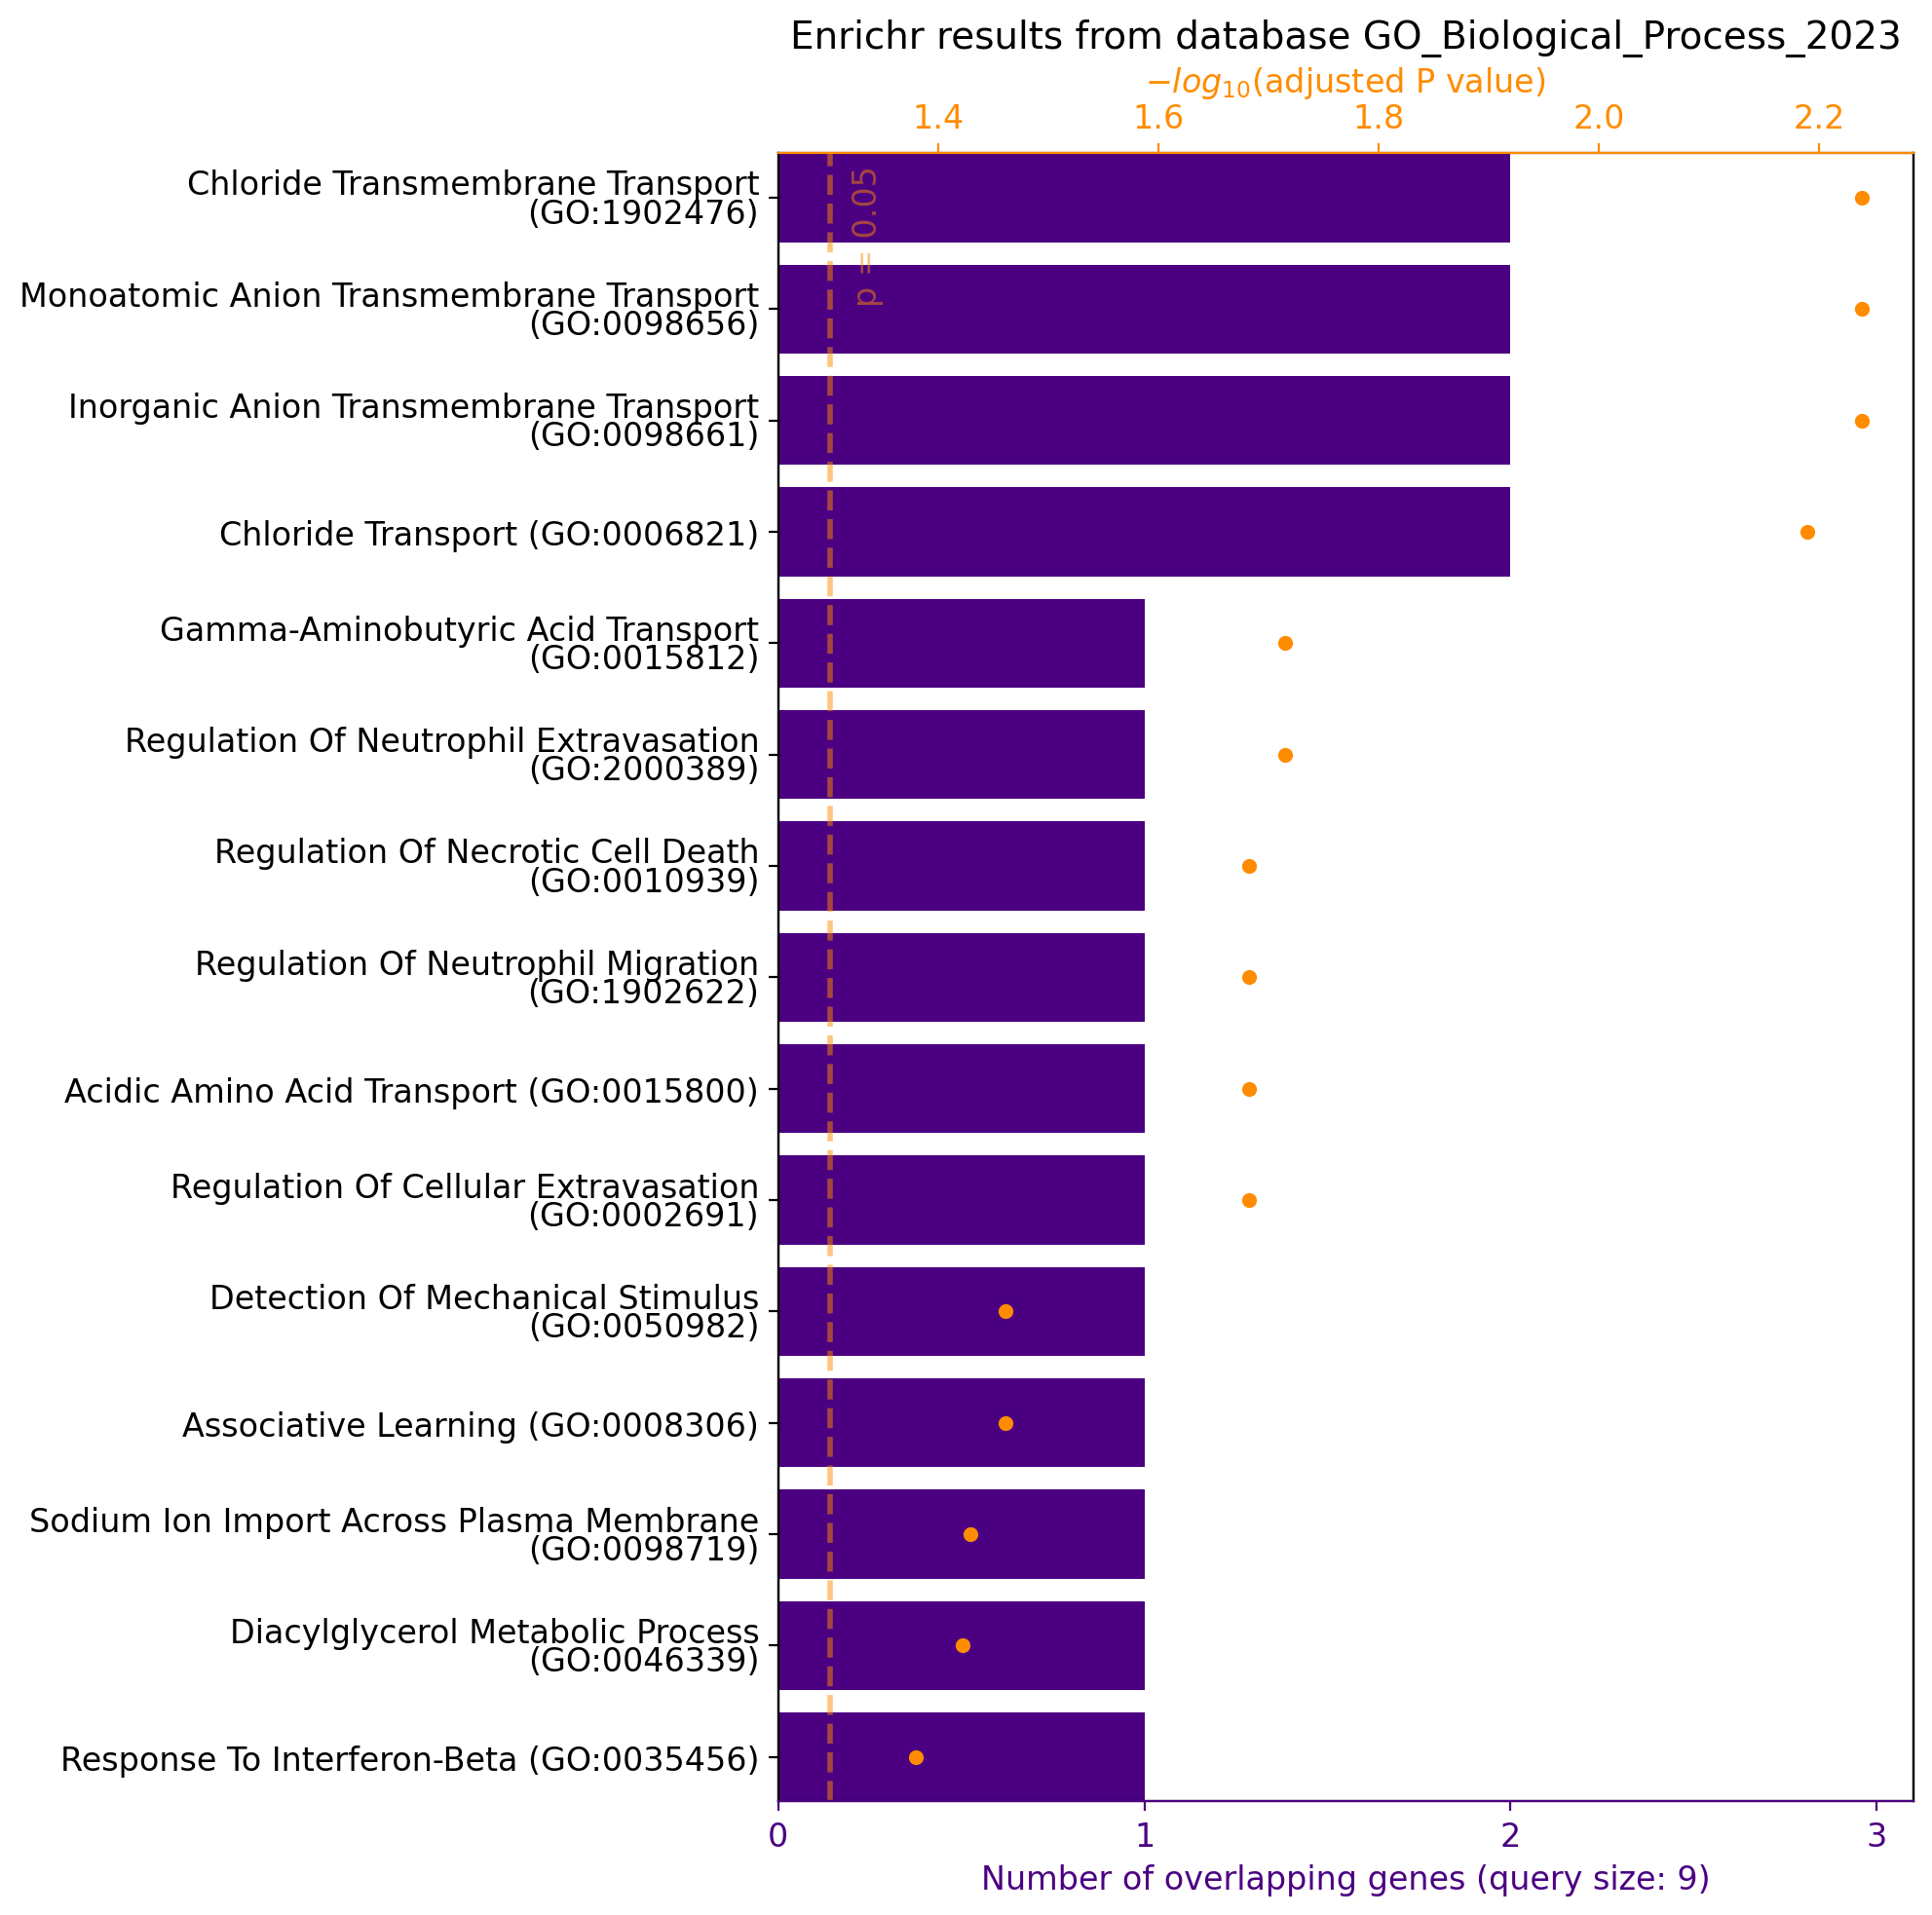

In [ ]:
# Perform enrichment analysis
u202260_enrichr_df = gget.enrichr(u202260_info_df["ensembl_gene_name"].dropna(axis=0).values, database=database, background=True, plot=True)

# Combine enrichment results into one plot

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
u10_enrichr_df

rank                                          path_name     p_val  \
0      1  Negative Regulation Of Viral Entry Into Host C...  0.000047   
1      2  Negative Regulation Of Viral Life Cycle (GO:19...  0.000059   
2      3  Regulation Of Viral Entry Into Host Cell (GO:0...  0.000290   
3      4              Neuroblast Proliferation (GO:0007405)  0.002910   
4      5  Regulation Of Establishment Of T Cell Polarity...  0.002910   
5      6  Positive Regulation Of Cysteine-Type Endopepti...  0.003491   
6      7  Complement Activation, Lectin Pathway (GO:0001...  0.004652   
7      8  Cell Surface Pattern Recognition Receptor Sign...  0.004652   
8      9   Positive Regulation Of Opsonization (GO:1903028)  0.004652   
9     10       Regulation Of Podosome Assembly (GO:0071801)  0.004652   
10    11       Actin-Mediated Cell Contraction (GO:0070252)  0.005232   
11    12     Epithelial Cell Apoptotic Process (GO:1904019)  0.005811   
12    13       Actin Filament Depolymerization (GO:0030042)  0.005811   
13    14  Positive Regulation Of Actin Nucleation (GO:00...  0.005811   
14    15  Regulation Of Cysteine-Type Endopeptidase Acti...  0.005811   
15    16            Regulation Of Opsonization (GO:1903027)  0.005811   
16    17          Relaxation Of Cardiac Muscle (GO:0055119)  0.006970   
17    18              Cell Projection Assembly (GO:0030031)  0.006970   
18    19                  Relaxation Of Muscle (GO:0090075)  0.007549   
19    20            Response To Muscle Stretch (GO:0035994)  0.008127   
20    21                      Renal Absorption (GO:0070293)  0.009861   
21    22  Regulation Of Establishment Of Cell Polarity (...  0.009861   
22    23                Actin Filament Capping (GO:0051693)  0.010438   
23    24       Cardiac Muscle Cell Contraction (GO:0086003)  0.010438   
24    25     Barbed-End Actin Filament Capping (GO:0051016)  0.010438   
25    26    Central Nervous System Development (GO:0007417)  0.011106   
26    27  Positive Regulation Of Protein Processing (GO:...  0.011592   
27    28          Cell Projection Organization (GO:0030030)  0.011592   
28    29        Regulation Of Actin Nucleation (GO:0051125)  0.011592   
29    30  Immune Response-Activating Cell Surface Recept...  0.012744   
30    31  Positive Regulation Of Epithelial Cell Apoptot...  0.013320   
31    32              Amyloid Fibril Formation (GO:1990000)  0.013320   
32    33  Negative Regulation Of Actin Filament Polymeri...  0.013320   
33    34          Plasma Membrane Invagination (GO:0099024)  0.015046   
34    35  Protein Localization To Cell Surface (GO:0034394)  0.015046   
35    36  Positive Regulation Of Cytosolic Calcium Ion C...  0.015620   
36    37              Apoptotic Cell Clearance (GO:0043277)  0.016194   
37    38  Regulation Of Protein Localization To Membrane...  0.016194   
38    39              Protein Depolymerization (GO:0051261)  0.016194   
39    40                            Pyroptosis (GO:0070269)  0.016194   
40    41  Innate Immune Response Activating Cell Surface...  0.017342   
41    42              Phagocytosis, Engulfment (GO:0006911)  0.017342   
42    43         Actin Filament Polymerization (GO:0030041)  0.017915   
43    44            Cardiac Muscle Contraction (GO:0060048)  0.019061   
44    45               Protein Destabilization (GO:0031648)  0.020777   
45    46  Positive Regulation Of Immune Effector Process...  0.021348   
46    47      Extracellular Matrix Disassembly (GO:0022617)  0.025340   
47    48        Cellular Component Disassembly (GO:0022411)  0.026478   
48    49                     Blood Circulation (GO:0008015)  0.028749   
49    50  Actin Polymerization Or Depolymerization (GO:0...  0.030450   
50    51  Pattern Recognition Receptor Signaling Pathway...  0.032148   
51    52  Microtubule Cytoskeleton Organization Involved...  0.033843   
52    53   Positive Regulation Of Phagocytosis (GO:0050766)  0.034407   
53    54  Positive Regulation Of Interleukin-8 Productio...  0

In [ ]:
u102540_enrichr_df

rank                                          path_name     p_val  \
0       1  Regulation Of Tumor Necrosis Factor Production...  0.000096   
1       2  Negative Regulation Of Antigen Receptor-Mediat...  0.000135   
2       3  Positive Regulation Of Type II Interferon Prod...  0.000799   
3       4          Cellular Response To Hypoxia (GO:0071456)  0.001228   
4       5  Cellular Response To Decreased Oxygen Levels (...  0.001262   
5       6  Positive Regulation Of Tumor Necrosis Factor P...  0.001403   
6       7  Positive Regulation Of Cytokine Production (GO...  0.001432   
7       8  Positive Regulation Of Tumor Necrosis Factor S...  0.001551   
8       9  Regulation Of Type II Interferon Production (G...  0.001786   
9      10  Positive Regulation Of Cell Cycle Process (GO:...  0.003254   
10     11  Negative Regulation Of B Cell Receptor Signali...  0.003636   
11     12  Maintenance Of Protein Location In Extracellul...  0.004362   
12     13  Regulation Of Extracellular Matrix Assembly (G...  0.004362   
13     14  Regulation Of Cardiac Muscle Hypertrophy In Re...  0.004362   
14     15            Cardiac Atrium Development (GO:0003230)  0.005087   
15     16  Regulation Of Chromosome Condensation (GO:0060...  0.005087   
16     17  Regulation Of Extracellular Matrix Constituent...  0.005087   
17     18  Positive Regulation Of Chromosome Condensation...  0.005087   
18     19  Negative Regulation Of Production Of Molecular...  0.005812   
19     20  Positive Regulation Of Extracellular Matrix As...  0.005812   
20     21  Protein Localization To Nuclear Envelope (GO:0...  0.006536   
21     22  Regulation Of Viral-Induced Cytoplasmic Patter...  0.006536   
22     23  Sequestering Of Extracellular Ligand From Rece...  0.006536   
23     24  Negative Regulation Of Cell-Cell Adhesion Medi...  0.006536   
24     25  Negative Regulation Of Cytokine Production (GO...  0.007162   
25     26  Negative Regulation Of Activin Receptor Signal...  0.007260   
26     27      Endomembrane System Organization (GO:0010256)  0.008295   
27     28   Regulation Of Chromosome Separation (GO:1905818)  0.008706   
28     29  Negative Regulation Of Interleukin-12 Producti...  0.008706   
29     30  Negative Regulation Of Cardiac Muscle Hypertro...  0.008706   
30     31  Negative Regulation Of Cell Cycle Phase Transi...  0.008706   
31     32     Regulation Of Leukocyte Migration (GO:0002685)  0.009428   
32     33     Myeloid Dendritic Cell Activation (GO:0001773)  0.009428   
33     34  Positive Regulation Of Chromosome Separation (...  0.009428   
34     35             Atrial Septum Development (GO:0003283)  0.009428   
35     36       Regulation Of Exit From Mitosis (GO:0007096)  0.010150   
36     37       Mitotic Chromosome Condensation (GO:0007076)  0.010871   
37     38  Positive Regulation Of Collagen Biosynthetic P...  0.010871   
38     39  Positive Regulation Of Cyclin-Dependent Protei...  0.010871   
39     40  Positive Regulation Of Endothelial Cell Apopto...  0.010871   
40     41                     Nuclear Migration (GO:0007097)  0.010871   
41     42  Regulation Of B Cell Receptor Signaling Pathwa...  0.011592   
42     43  Positive Regulation Of Collagen Metabolic Proc...  0.011592   
43     44  Myeloid Cell Activation Involved In Immune Res...  0.012312   
44     45         Nuclear Envelope Organization (GO:0006998)  0.012312   
45     46  Regulation Of Cell-Cell Adhesion Mediated By C...  0.012312   
46     47  Regulation Of Collagen Biosynthetic Process (G...  0.013032   
47     48  Positive Regulation Of Phosphoprotein Phosphat...  0.013032   
48     49   Regulation Of Lymphocyte Activation (GO:0051249)  0.013032   
49     50  Negative Regulation Of T Cell Receptor Signali...  0.013032   
50     51  Positive Regulation Of Chromosome Segregation ...  0.013032   
51     52  Positive Regulation Of Cyclin-Dependent Protei...  0.013032   
52     53  Positive Regulation Of Extracellular Matrix Or...  0.013032   
53     54

In [ ]:
u11150_enrichr_df

rank                                          path_name     p_val  \
0       1           Leukocyte Apoptotic Process (GO:0071887)  0.002667   
1       2                       p38MAPK Cascade (GO:0038066)  0.004265   
2       3  Regulation Of Endothelial Cell Development (GO...  0.004265   
3       4            Adherens Junction Assembly (GO:0034333)  0.004797   
4       5  Receptor-Mediated Endocytosis Of Virus By Host...  0.005328   
5       6         Epithelial Cell-Cell Adhesion (GO:0090136)  0.005860   
6       7             Cellular Response To UV-B (GO:0071493)  0.005860   
7       8  Cellular Response To Thyroid Hormone Stimulus ...  0.005860   
8       9           Response To Thyroid Hormone (GO:0097066)  0.006391   
9      10  Positive Regulation Of Muscle Cell Differentia...  0.007983   
10     11                      Response To UV-B (GO:0010224)  0.008513   
11     12  Regulation Of Establishment Of Endothelial Bar...  0.008513   
12     13        Glycoprotein Catabolic Process (GO:0006516)  0.008513   
13     14  Plasma Membrane Bounded Cell Projection Assemb...  0.008957   
14     15          Microtubule Depolymerization (GO:0007019)  0.009043   
15     16                Protein Autoprocessing (GO:0016540)  0.009572   
16     17  Stress-Activated Protein Kinase Signaling Casc...  0.010631   
17     18  Regulation Of Cell-Substrate Junction Assembly...  0.011160   
18     19  Regulation Of Muscle Cell Differentiation (GO:...  0.012745   
19     20                Lamellipodium Assembly (GO:0030032)  0.013273   
20     21  Positive Regulation Of Peptidase Activity (GO:...  0.013273   
21     22  Protein Localization To Cell Surface (GO:0034394)  0.013800   
22     23  Antigen Processing And Presentation Of Exogeno...  0.013800   
23     24  Positive Regulation Of Microtubule Polymerizat...  0.013800   
24     25  Positive Regulation Of Erythrocyte Differentia...  0.013800   
25     26  Microtubule Polymerization Or Depolymerization...  0.014327   
26     27      Regulation Of Peptidase Activity (GO:0052547)  0.014327   
27     28        Morphogenesis Of An Epithelium (GO:0002009)  0.014854   
28     29              Protein Depolymerization (GO:0051261)  0.014854   
29     30  Antigen Processing And Presentation Of Peptide...  0.014854   
30     31    Maintenance Of Blood-Brain Barrier (GO:0035633)  0.015381   
31     32  Positive Regulation Of Microtubule Polymerizat...  0.015381   
32     33            Lamellipodium Organization (GO:0097581)  0.015908   
33     34  Antigen Processing And Presentation Of Exogeno...  0.016434   
34     35            Non-Motile Cilium Assembly (GO:1905515)  0.016434   
35     36  Positive Regulation Of Interleukin-12 Producti...  0.017486   
36     37          Sister Chromatid Segregation (GO:0000819)  0.018011   
37     38        Adherens Junction Organization (GO:0034332)  0.018537   
38     39                  Platelet Aggregation (GO:0070527)  0.018537   
39     40  Regulation Of Erythrocyte Differentiation (GO:...  0.019062   
40     41  Positive Regulation Of Myeloid Cell Differenti...  0.019062   
41     42  Regulation Of Microtubule Polymerization (GO:0...  0.021159   
42     43                      Axoneme Assembly (GO:0035082)  0.021683   
43     44         Stress-Activated MAPK Cascade (GO:0051403)  0.022206   
44     45           Monoatomic Cation Transport (GO:0006812)  0.022206   
45     46                    Zymogen Activation (GO:0031638)  0.023252   
46     47  Regulation Of Apoptotic Signaling Pathway (GO:...  0.023775   
47     48              Mitotic Nuclear Division (GO:0140014)  0.023775   
48     49          Homotypic Cell-Cell Adhesion (GO:0034109)  0.024298   
49     50  Regulation Of Interleukin-12 Production (GO:00...  0.025863   
50     51   Mitotic Metaphase Plate Congression (GO:0007080)  0.026385   
51     52           Metaphase Plate Congression (GO:0051310)  0.026906   
52     53          Microtubule Bundle Formation (GO:0001578)  0.026906   
53     54

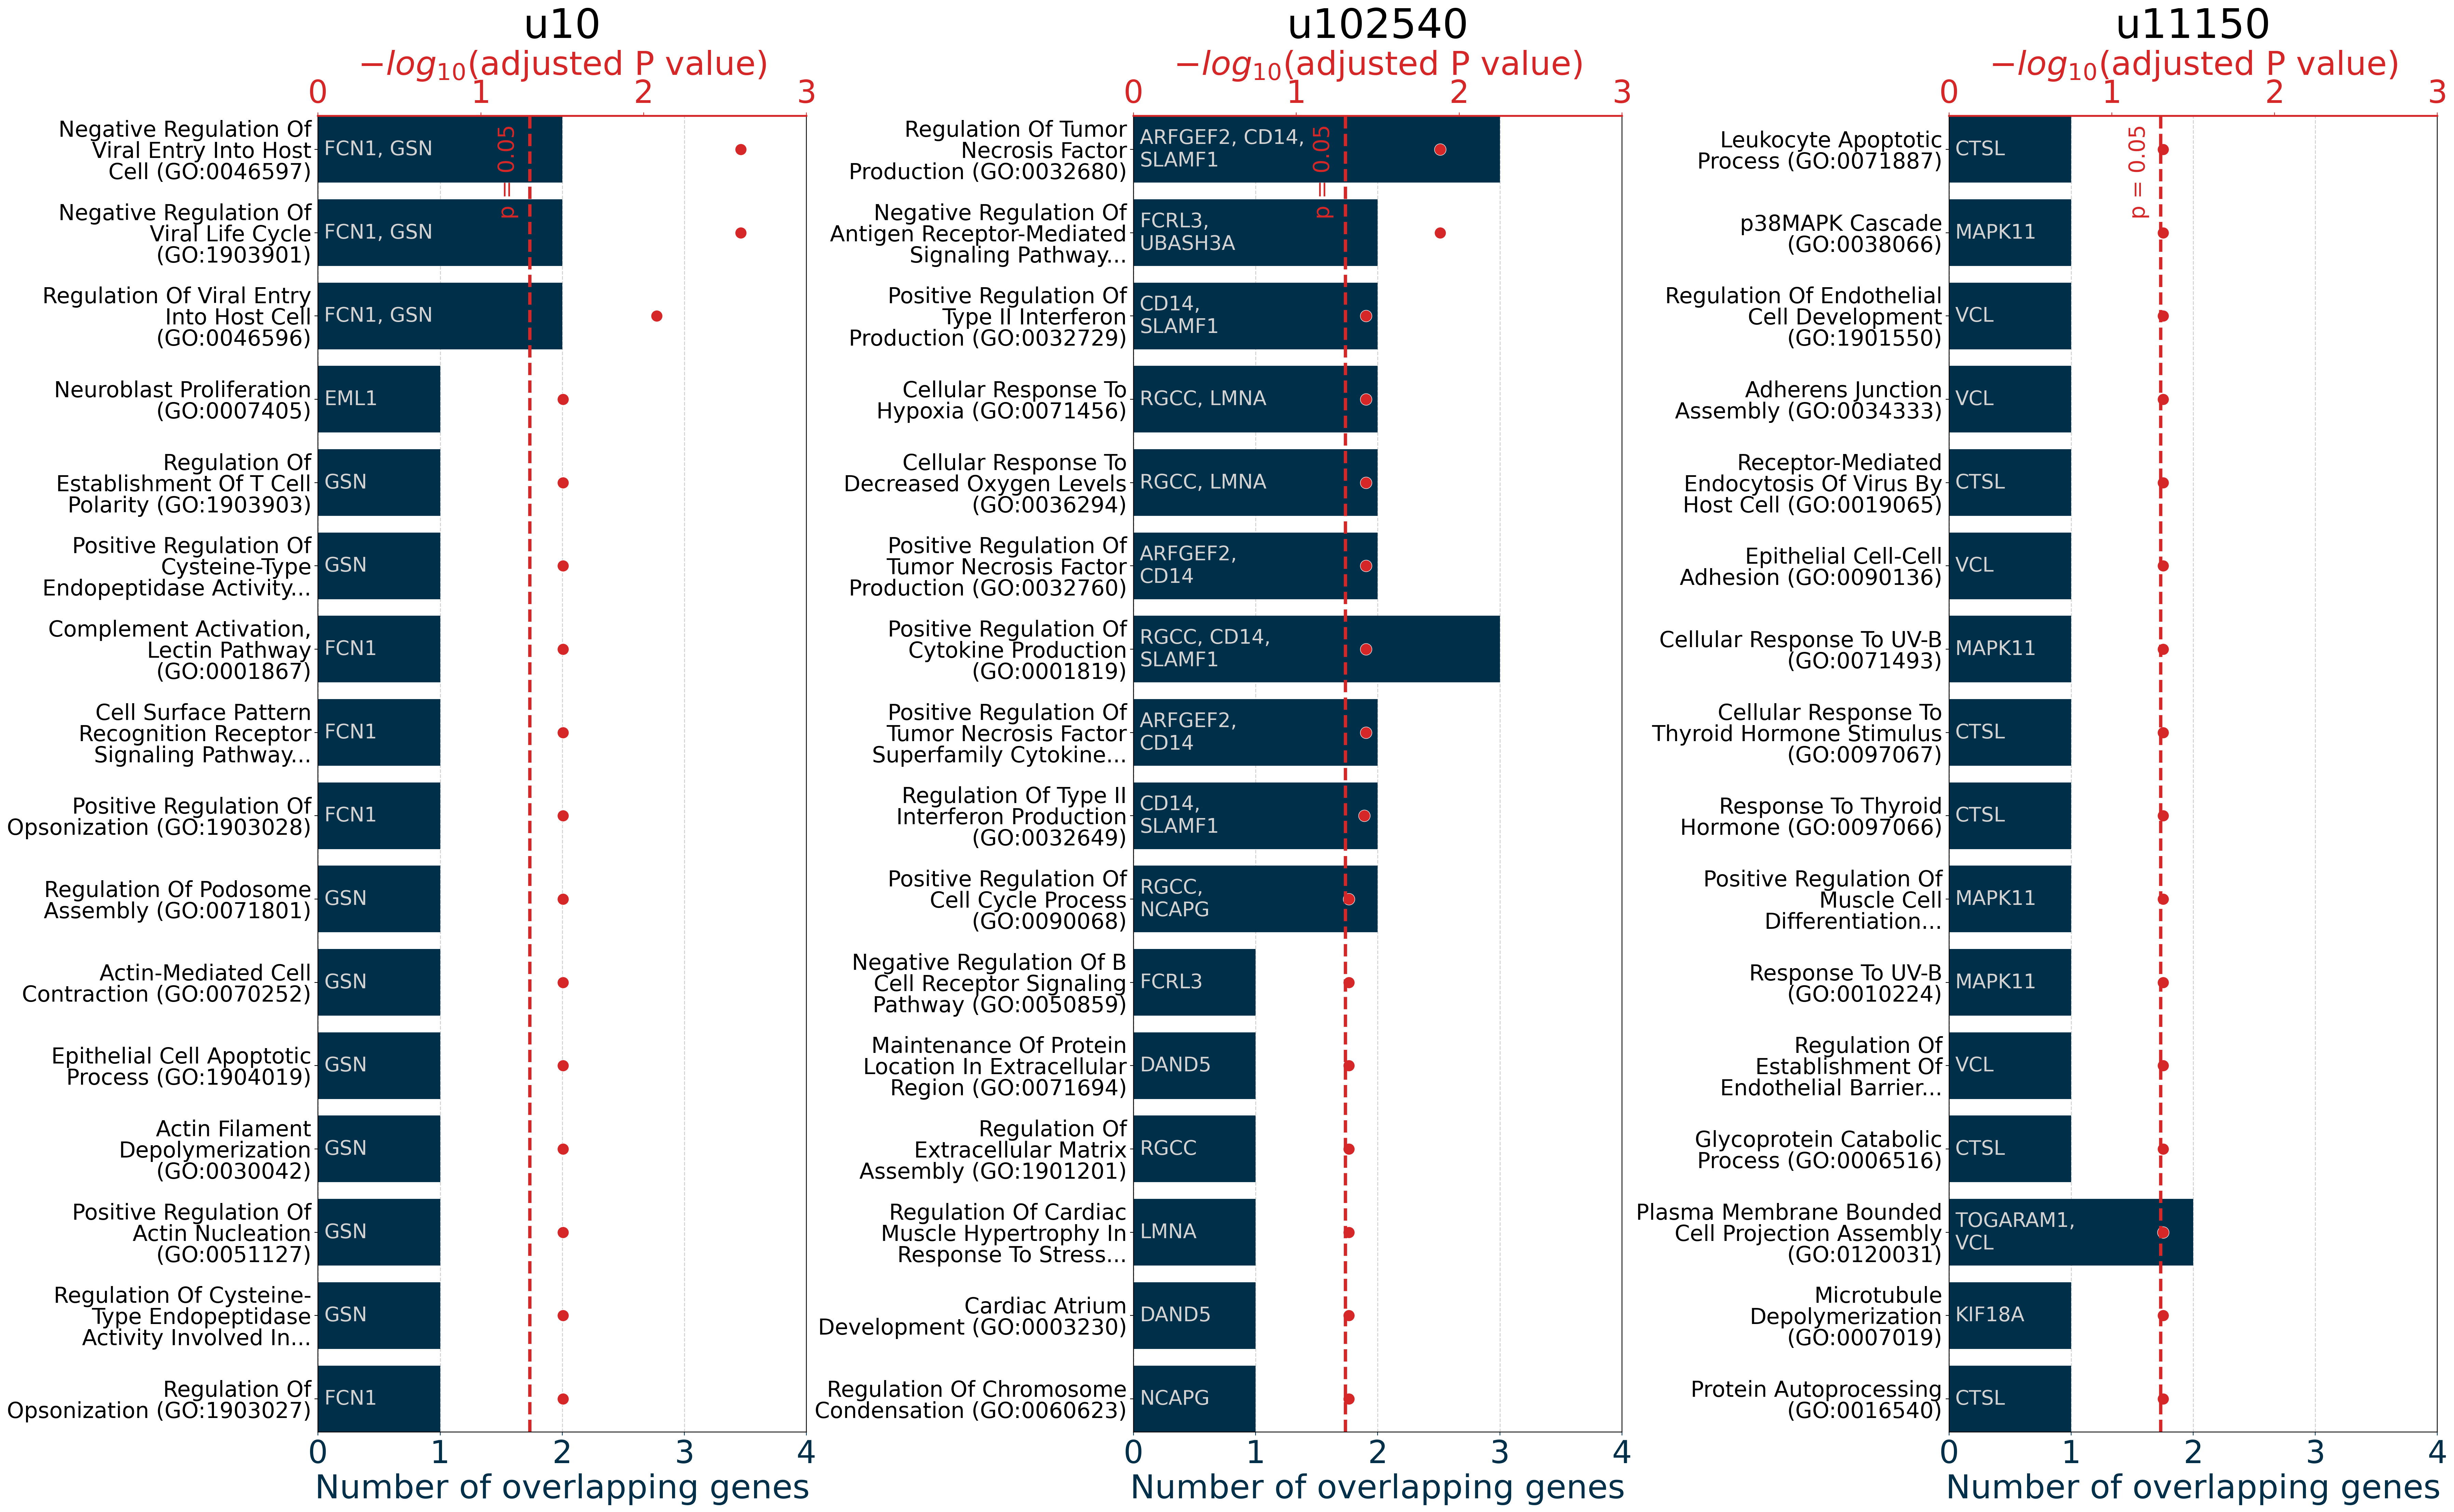

In [ ]:
# Number of paths to plot
n_paths = 16

dfs = [
    u10_enrichr_df[:n_paths],
    u102540_enrichr_df[:n_paths],
    u11150_enrichr_df[:n_paths]
]
vir_names = ["u10", "u102540", "u11150"]

fig, axs = plt.subplots(figsize=(40, 25), ncols=len(vir_names))
fontsize = 23
barcolor = "#003049"
p_val_color = "tab:red" # orange: #f77f00
max_genes = 4
max_p = 3
for i, (df, vir) in enumerate(zip(dfs, vir_names)):
    ax1 = axs[i]

    overlapping_genes = df["overlapping_genes"].values
    path_names = df["path_name"].values
    adj_p_values = df["adj_p_val"].values

    # Get gene counts
    gene_counts = []
    for gene_list in overlapping_genes:
        gene_counts.append(len(gene_list))

    # # Sort by number of genes in pathway
    # overlapping_genes = overlapping_genes[np.argsort(gene_counts)][::-1]
    # path_names = path_names[np.argsort(gene_counts)][::-1]
    # adj_p_values = adj_p_values[np.argsort(gene_counts)][::-1]
    # gene_counts = np.sort(gene_counts)[::-1]

    # Wrap pathway labels
    labels = []
    for label in path_names:
        labels.append(
            textwrap.fill(
                label,
                width=25,
                break_long_words=False,
                max_lines=3,
                placeholder="...",
            )
        )

    # Plot barplot
    # ax1.barh(labels, gene_counts, color=cmap(c_values), align="center")
    ax1.barh(np.arange(len(gene_counts)), gene_counts, color=barcolor, align="center")

    # Add gene names to bar plot
    for idx, (gc, og) in enumerate(zip(gene_counts, overlapping_genes)):
        clean_genes = textwrap.fill(
                ", ".join(og),
                width=gc/2*10,
                break_long_words=False,
                max_lines=2,
                placeholder="...",
            )

        ax1.text(0.05, idx, clean_genes, fontsize=fontsize-2, color="lightgrey", va="center", ha="left")

    ax1.set_yticks(np.arange(len(gene_counts)), labels, linespacing=1, fontsize=fontsize)
    ax1.invert_yaxis()

    # Set x-limits
    # ax1.set_xlim(0, ax1.get_xlim()[1]+0.01)
    ax1.set_xlim(left=0, right=max_genes)

    # Add adj. P value secondary x-axis
    ax2 = ax1.twiny()
    ax2.scatter(-np.log10(adj_p_values), np.arange(len(gene_counts)), color=p_val_color, s=150, edgecolor="white", lw=0.5)
    # Change label and color of p-value axis
    ax2.set_xlabel(
        "$-log_{10}$(adjusted P value)", fontsize=fontsize+12, color=p_val_color
    )
    ax2.spines["top"].set_color(p_val_color)
    ax2.spines["top"].set_linewidth(2)
    ax2.tick_params(axis="x", colors=p_val_color, labelsize=fontsize+10)

    # # Set x2-limits
    ax2.set_xlim(left=0, right=max_p)

    # Add alpha=0.05 p-value cutoff
    ax2.axvline(-np.log10(0.05), color=p_val_color, ls="--", lw=3.5)
    t = ax2.text(
        -np.log10(0.05) - 0.2,
        -0.3,
        "p = 0.05",
        ha="left",
        va="top",
        rotation="vertical",
        # fontweight="bold",
        color=p_val_color,
        fontsize=fontsize,
    )

    # Set label and color of count axis
    ax1.set_xlabel(
        f"Number of overlapping genes",
        color=barcolor,
        fontsize=fontsize+12,
    )
    ax1.tick_params(axis="x", labelsize=fontsize+10, colors=barcolor)
    # Set bottom x axis to keep only integers since counts cannot be floats
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    # Change fontsize of y-tick labels
    ax1.tick_params(axis="y", labelsize=fontsize)

    # Set title
    ax1.set_title(
        f"{vir}", fontsize=fontsize+20, pad=12
    )

    # Set axis margins
    ax1.margins(y=0, x=0)

    ax1.grid(True, which="both", color="lightgrey", ls="--", lw=1)
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(False)

plt.subplots_adjust(wspace=0.67)

# Save figure
fig.savefig(
    f"{genes_kind}_gene_enrichment.png", dpi=300, bbox_inches="tight", transparent=True
)

fig.show()